In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "/Users/sreevaatsav/Downloads/SunbaseData_assignment/customer_churn_large_dataset.xlsx"
df = pd.read_excel(file_path)
print(df.shape)

(100000, 9)


# Data Preprocessing and Visualization

In [3]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [4]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

/var/folders/3q/txm7h4896k7f8pcsm9l619lh0000gn/T/ipykernel_35184/3321745965.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


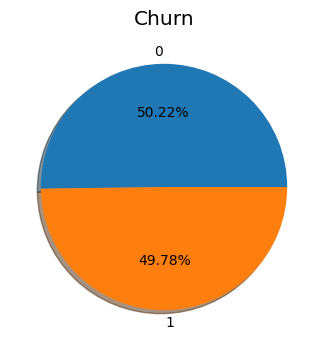

In [5]:
def get_count(df):
    
    unvals = list(df.unique())
    op = [0]*len(unvals)
    
    i = 0
    for un in unvals:
        op[i] = df[df == un].shape[0]
        i += 1
        
    return [list(unvals),op]


cont = get_count(df["Churn"])
clables = cont[0]

plt.figure(figsize=(8,4))
plt.title("Churn", fontsize = 14.5)
plt.style.use('seaborn-colorblind')
plt.pie(np.array(cont[1]), labels=clables, autopct='%1.2f%%', shadow=True)
plt.show()

### This seems like a perfectly balanced distribution of data, which could be much easier to handle than imbalanced classes.

We can split the data uniformly into training and testing parts, without bothering about the class imbalaces 

In [6]:
df.isna().sum()

# Looks like there are no NULL-values, but we'll check it much deeper

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

### For evaluating the models we build, we firstly split the data into training and testing splits 

In [7]:
Y = df["Churn"]
del df["Churn"]
X = df

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=66)

In [9]:
x_train["CustomerID"].nunique(), x_train["Name"].nunique()
# We can see that there are unique customer IDs and Names 

(85000, 85000)

/var/folders/3q/txm7h4896k7f8pcsm9l619lh0000gn/T/ipykernel_35184/2820566028.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


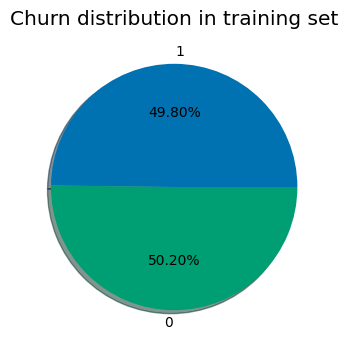

In [10]:
cont = get_count(y_train)
clables = cont[0]

plt.figure(figsize=(8,4))
plt.title("Churn distribution in training set", fontsize = 14.5)
plt.style.use('seaborn-colorblind')
plt.pie(np.array(cont[1]), labels=clables, autopct='%1.2f%%', shadow=True)
plt.show()

In [11]:
x_train["Location"].unique()

# There are 5 unique locations mentioned in the training set 

array(['Miami', 'New York', 'Los Angeles', 'Chicago', 'Houston'],
      dtype=object)

In [12]:
set(x_test["Location"].unique()) == set(x_train["Location"].unique())

# There are same type of locations mentioned in both training and testing sets  

True

In [13]:
## Function to encode categorical features into intergers 

def encode_to_int(arr):
    d = {}
    for p in enumerate(arr):
        if p[1] not in d:
            d[p[1]] = p[0]+1
        
    return d

In [14]:
# Creating new dataframes just for better visualization 

x_train_vis = pd.concat([x_train,y_train], axis = 1)

x_test_vis = pd.concat([x_test,y_test], axis = 1)

## Visualization of Location of the users 

/var/folders/3q/txm7h4896k7f8pcsm9l619lh0000gn/T/ipykernel_35184/1656441217.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


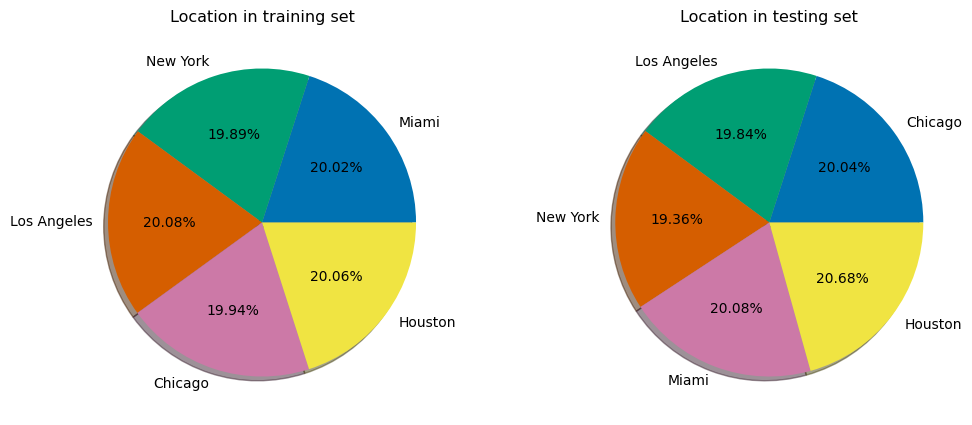

In [15]:
cont = get_count(x_train["Location"])
clables = cont[0]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Location in training set", fontsize = 11.5)
plt.style.use('seaborn-colorblind')
plt.pie(np.array(cont[1]), labels=clables, autopct='%1.2f%%', shadow=True)


cont = get_count(x_test["Location"])
clables = cont[0]
plt.subplot(1,2,2)
plt.title("Location in testing set", fontsize = 11.5)
plt.pie(np.array(cont[1]), labels=clables, autopct='%1.2f%%', shadow=True)


plt.show()

#### Both these distributions of locations are similar and are uniformly spread

In [16]:
loc_dict = encode_to_int(list(x_train["Location"].unique()))

def location(s):
    return loc_dict[s]

x_train["Location"] = x_train["Location"].apply(location)

inv_loc_dict = {v: k for k, v in loc_dict.items()}

In [265]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236
1,2,Customer_2,62,Female,New York,1,48.76,172
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460
3,4,Customer_4,36,Female,Miami,3,97.94,297
4,5,Customer_5,46,Female,Miami,19,58.14,266
...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226
99996,99997,Customer_99997,62,Female,New York,19,61.65,351
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251
99998,99999,Customer_99999,51,Female,New York,20,49.25,434


In [17]:
x_test["Location"] = x_test["Location"].apply(location)

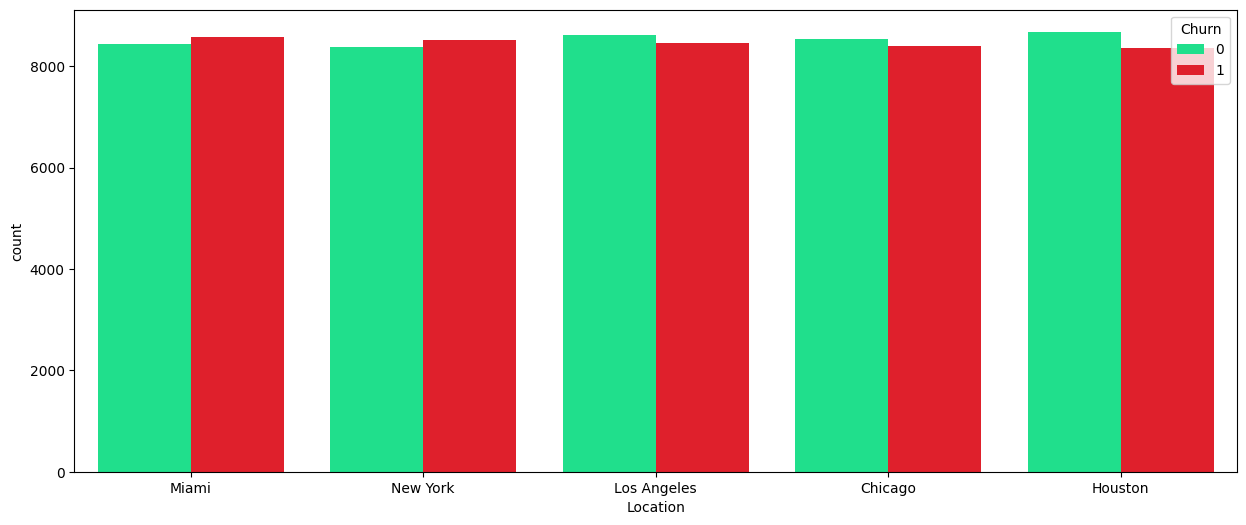

In [18]:
custom_palette = ["#00FF90", "#FF0010"] 

plt.figure(figsize=(15, 6))
sns.countplot(data=x_train_vis, x="Location", hue="Churn", palette=custom_palette)
plt.show()

## Gender distribution of the data

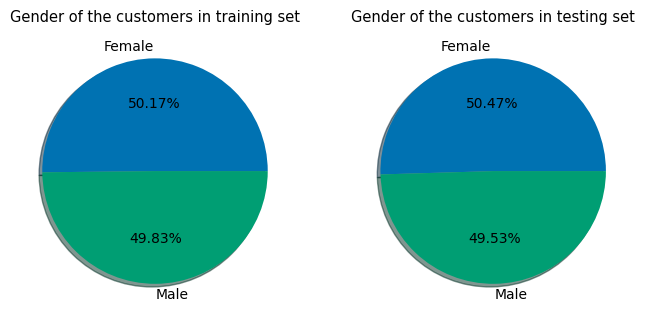

In [19]:
plt.figure(figsize=(8,5))

cont = get_count(x_train["Gender"])
clables = cont[0]
plt.subplot(1,2,1)
plt.title("Gender of the customers in training set", fontsize = 10.5)
plt.pie(np.array(cont[1]), labels=clables, autopct='%1.2f%%', shadow=True)


cont = get_count(x_test["Gender"])
clables = cont[0]
plt.subplot(1,2,2)
plt.title("Gender of the customers in testing set", fontsize = 10.5)
plt.pie(np.array(cont[1]), labels=clables, autopct='%1.2f%%', shadow=True)



plt.show()

In [20]:
x_train

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
33691,33692,Customer_33692,19,Female,1,9,99.83,294
32504,32505,Customer_32505,38,Female,2,24,36.04,251
40182,40183,Customer_40183,43,Female,3,12,38.68,112
52531,52532,Customer_52532,59,Male,4,15,68.57,180
36064,36065,Customer_36065,18,Female,3,1,55.84,140
...,...,...,...,...,...,...,...,...
50893,50894,Customer_50894,38,Female,5,6,99.62,196
62586,62587,Customer_62587,37,Female,2,2,39.69,429
8243,8244,Customer_8244,67,Male,5,11,31.05,292
8823,8824,Customer_8824,45,Male,2,16,34.58,355


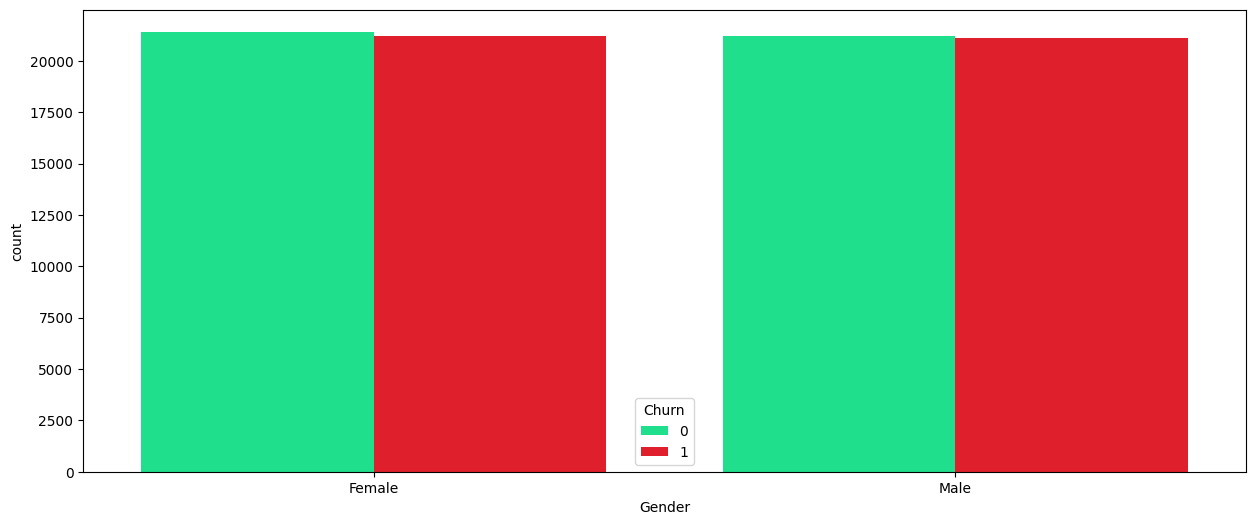

In [21]:
custom_palette = ["#00FF90", "#FF0010"] 

plt.figure(figsize=(15, 6))
sns.countplot(data=x_train_vis, x="Gender", hue="Churn", palette=custom_palette)
plt.show()


In [22]:
gend_dict = encode_to_int(list(x_train["Gender"].unique()))

def gend(s):
    return gend_dict[s]

x_train["Gender"] = x_train["Gender"].apply(gend)

inv_gend_dict = {v: k for k, v in gend_dict.items()}

x_test["Gender"] = x_test["Gender"].apply(gend)


## Age distribution of the customers 

In [23]:
# Funtion to plot the KDEs based on chrun type

def plot_kde(df, column, cumulative=False, fill = True):
    
    plt.figure(figsize=(15,6))
    sns.kdeplot(data=df, x = column,hue="Churn", palette=custom_palette,  fill=fill, cumulative=cumulative)
    plt.show()


<Figure size 2000x1000 with 0 Axes>

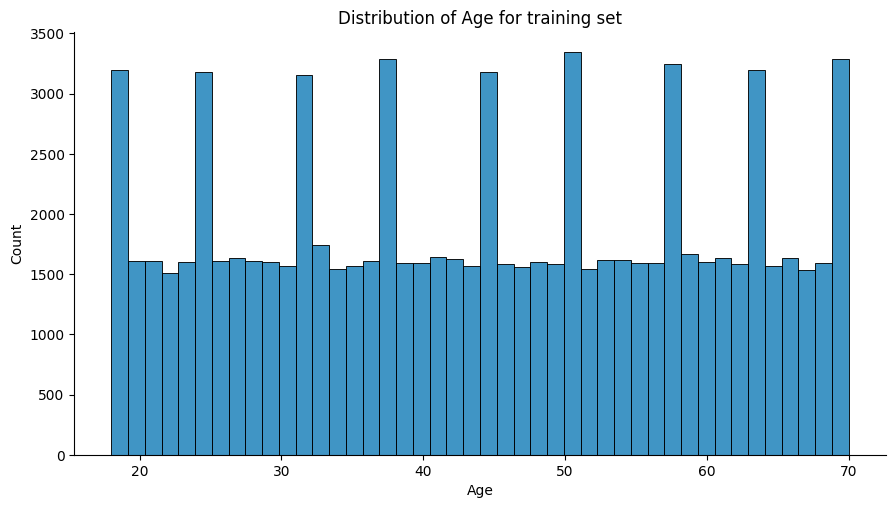

In [24]:
plt.figure(figsize=(20,10))

sns.displot(x_train["Age"])
plt.gcf().set_size_inches(10, 5)
plt.title('Distribution of Age for training set' )


plt.show()

<Figure size 2000x1000 with 0 Axes>

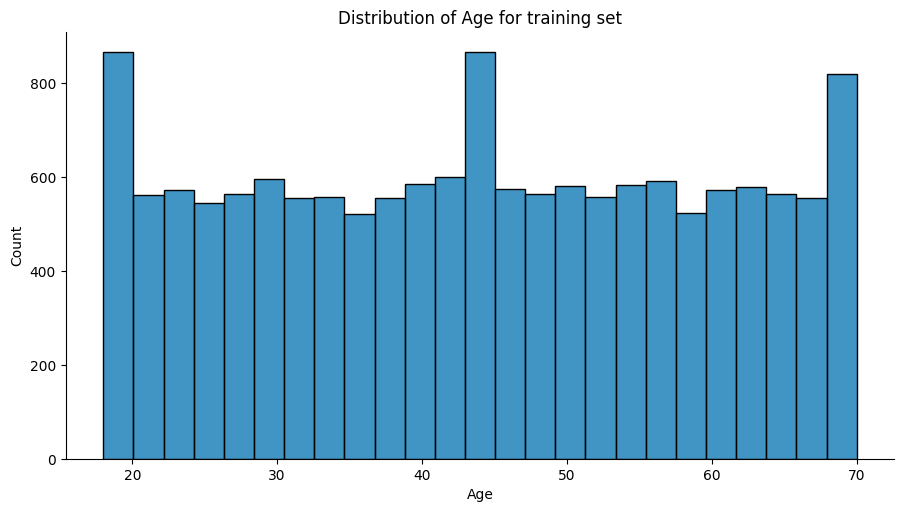

In [25]:
plt.figure(figsize=(20,10))

sns.displot(x_test["Age"])
plt.gcf().set_size_inches(10, 5)
plt.title('Distribution of Age for training set' )

plt.show()

#### We  can see a clear distinction between the training and testing distribution of age, this might make a significant difference while modelling the data

#### There are a few age groups where the number of customers are high in this distributoion and these age groups are evenly spaced!

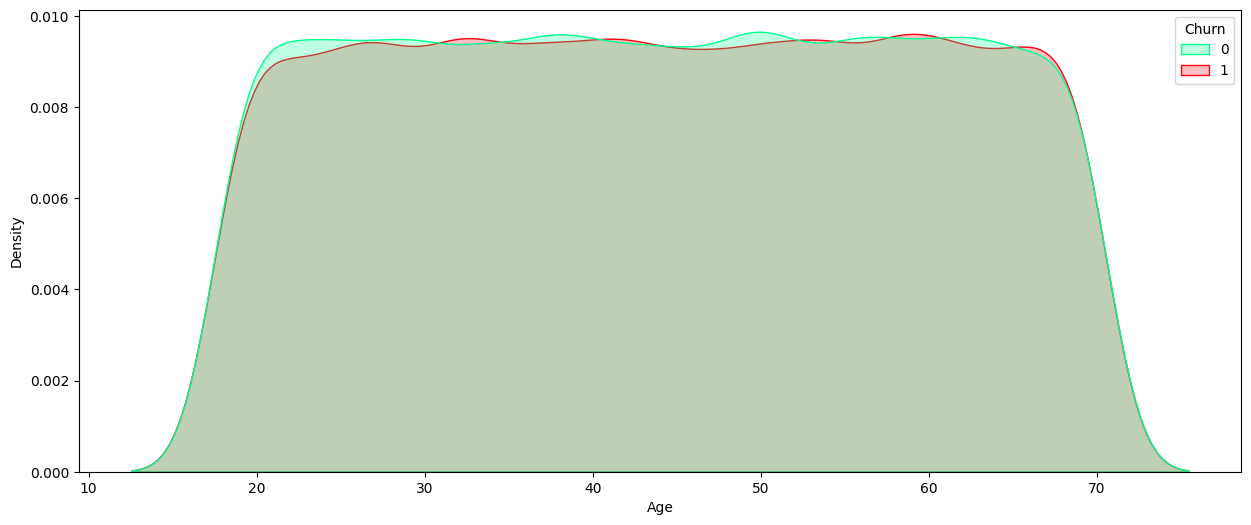

In [26]:
plot_kde(x_train_vis, "Age")


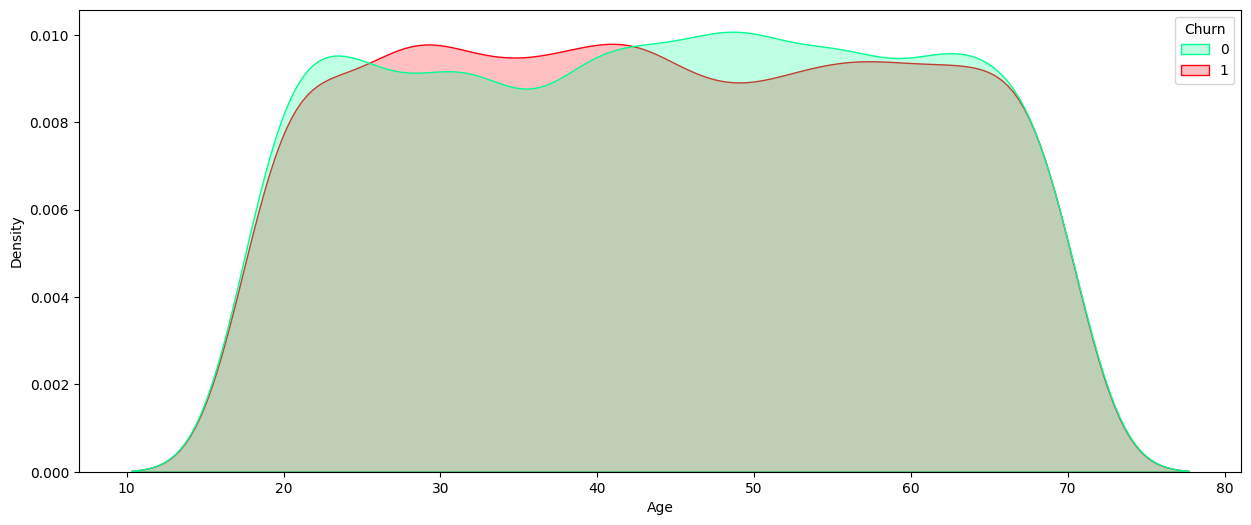

In [27]:
plot_kde(x_test_vis, "Age")

### By looking at these above plot, we can see a uniform distribution of the data in both the classes 

## Subscription length months of the customers 

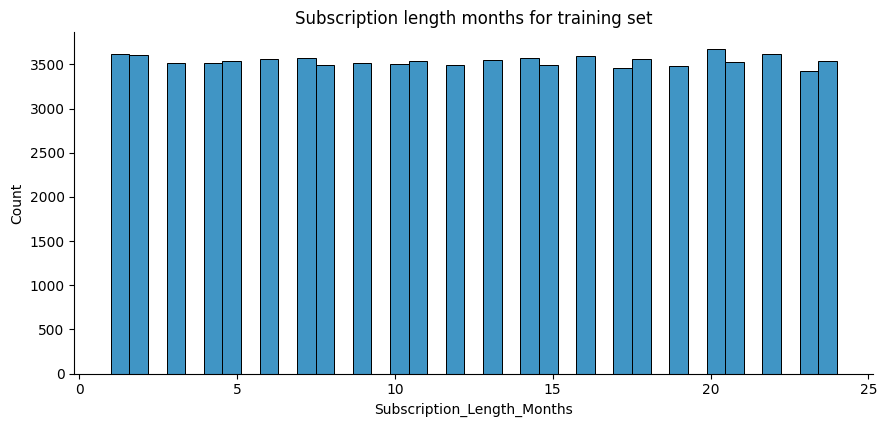

In [28]:
# plt.figure(figsize=(20,10))

sns.displot(x_train["l"])
plt.gcf().set_size_inches(10, 4)

plt.title('Subscription length months for training set' )

plt.show()

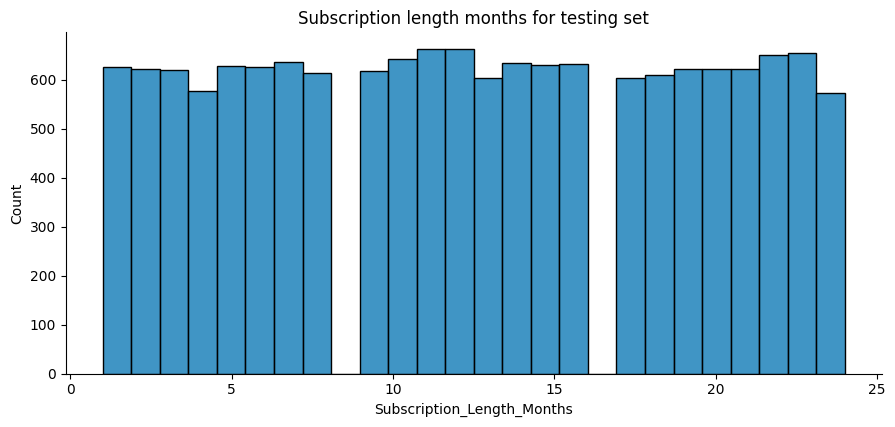

In [29]:
sns.displot(x_test["Subscription_Length_Months"])
plt.gcf().set_size_inches(10, 4)

plt.title('Subscription length months for testing set' )

plt.show()

/var/folders/3q/txm7h4896k7f8pcsm9l619lh0000gn/T/ipykernel_35184/370237006.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train["Subscription_Length_Months"])
/var/folders/3q/txm7h4896k7f8pcsm9l619lh0000gn/T/ipykernel_35184/370237006.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_t

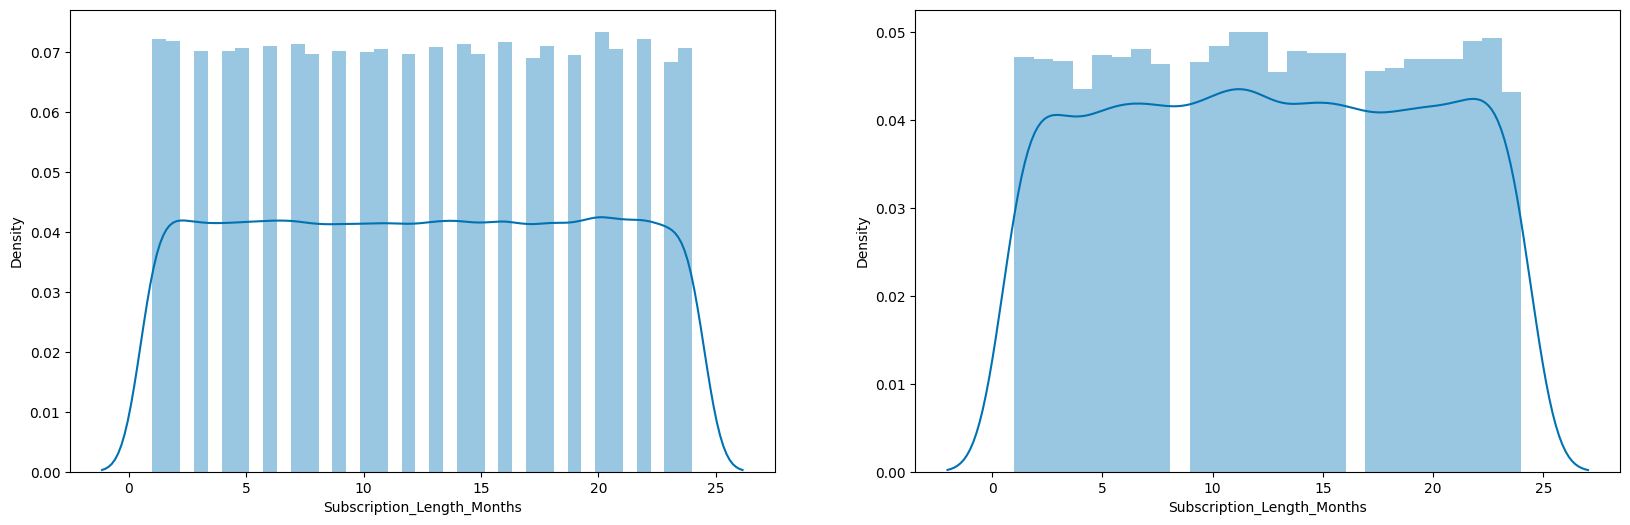

In [30]:
# sns.distplot(x_train["Subscription_Length_Months"])

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(x_train["Subscription_Length_Months"])

plt.subplot(1,2,2)
sns.distplot(x_test["Subscription_Length_Months"])
plt.show()

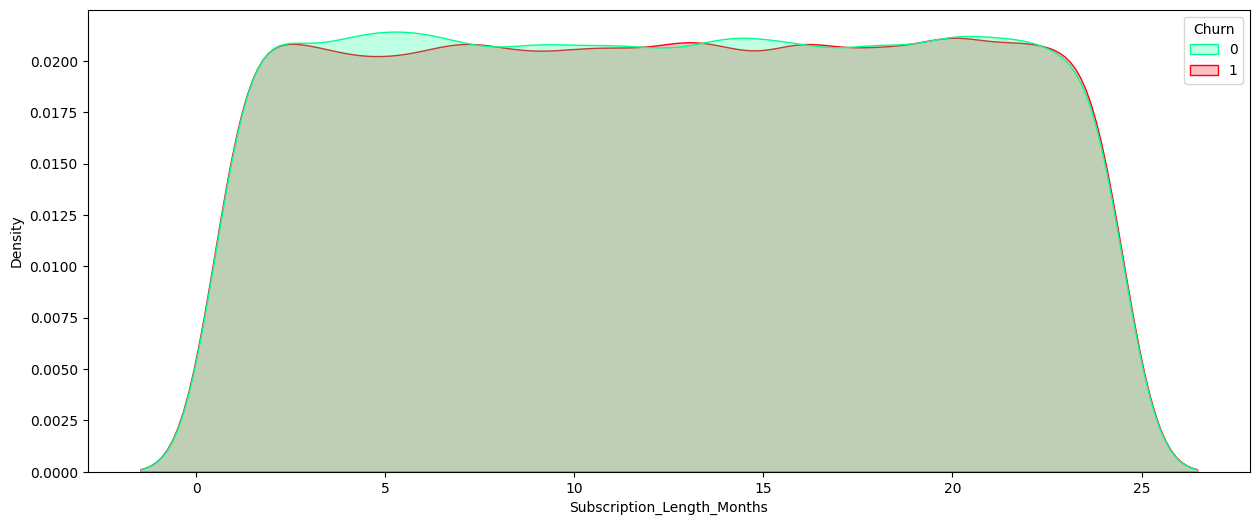

In [31]:
plot_kde(x_train_vis, "Subscription_Length_Months")


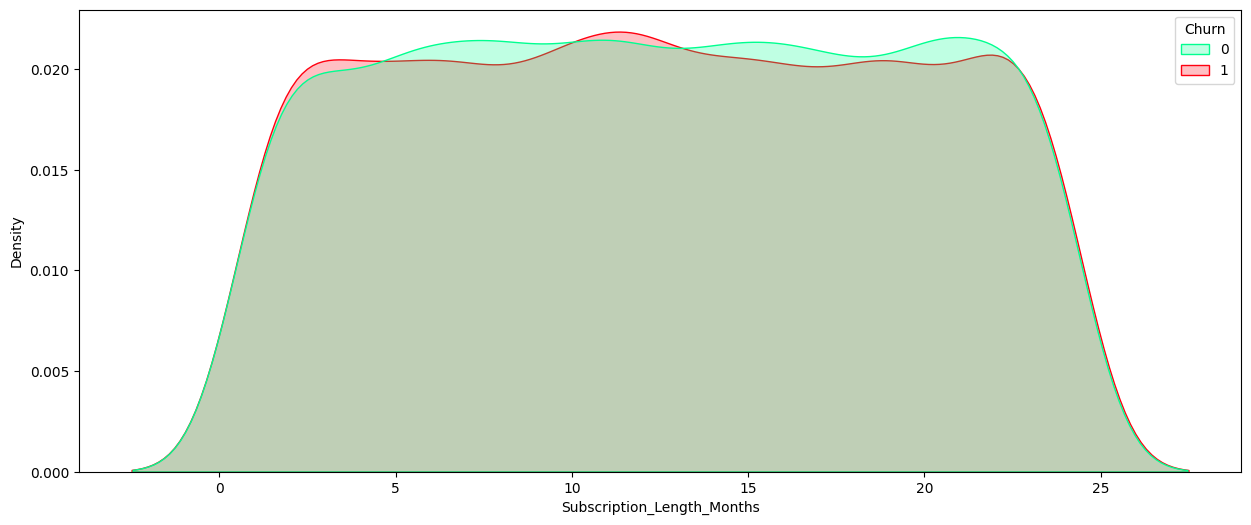

In [32]:
plot_kde(x_test_vis, "Subscription_Length_Months")


# Total data usage ( in GB ) of the customers 


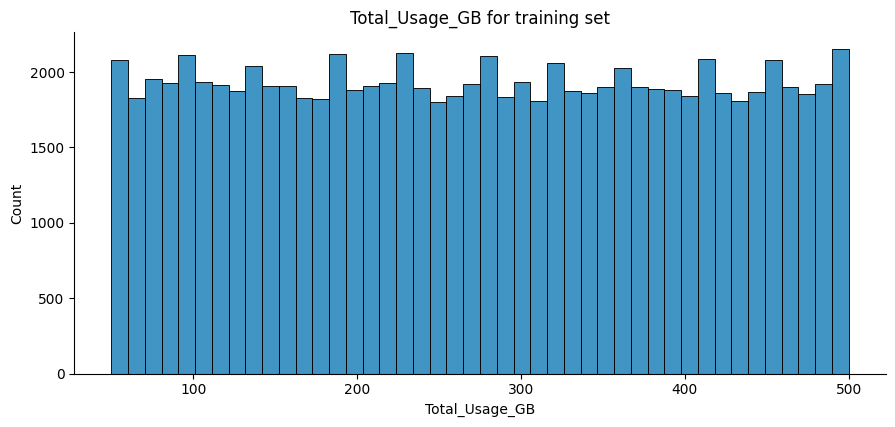

In [33]:
sns.displot(x_train["Total_Usage_GB"])
plt.gcf().set_size_inches(10, 4)

plt.title('Total_Usage_GB for training set' )

plt.show()

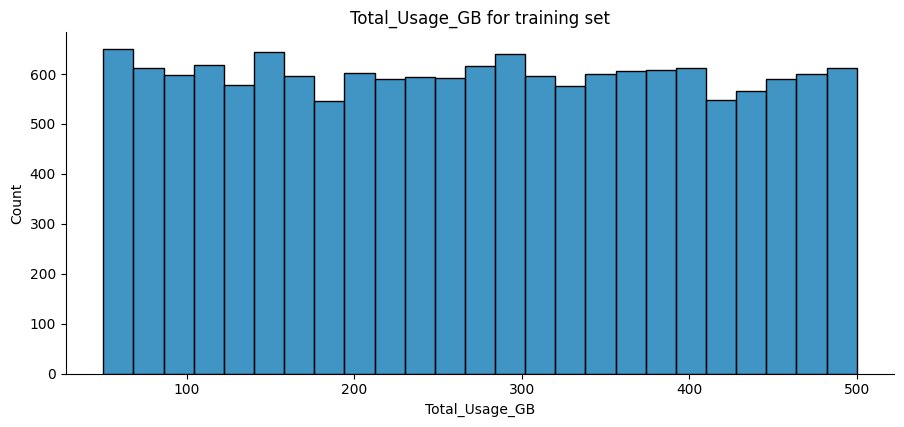

In [34]:
sns.displot(x_test["Total_Usage_GB"])
plt.gcf().set_size_inches(10, 4)

plt.title('Total_Usage_GB for training set' )

plt.show()

/var/folders/3q/txm7h4896k7f8pcsm9l619lh0000gn/T/ipykernel_35184/3499285015.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train["Total_Usage_GB"])
/var/folders/3q/txm7h4896k7f8pcsm9l619lh0000gn/T/ipykernel_35184/3499285015.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_test["Total

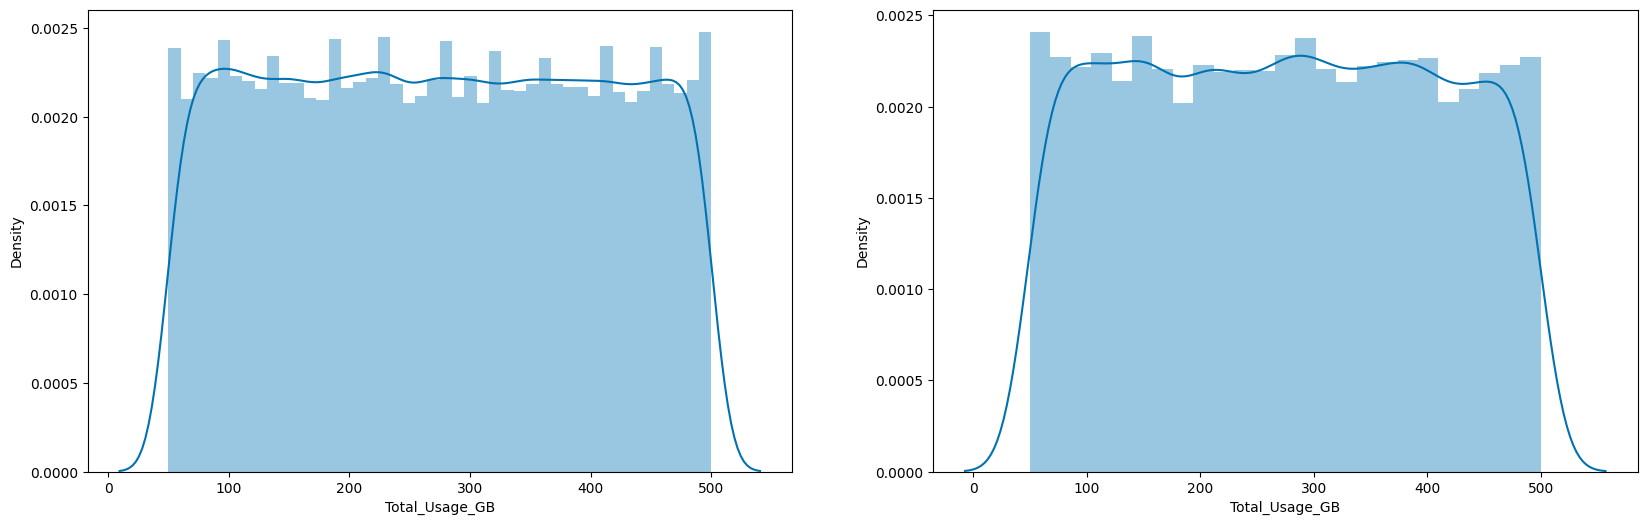

In [35]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(x_train["Total_Usage_GB"])

plt.subplot(1,2,2)
sns.distplot(x_test["Total_Usage_GB"])
plt.show()

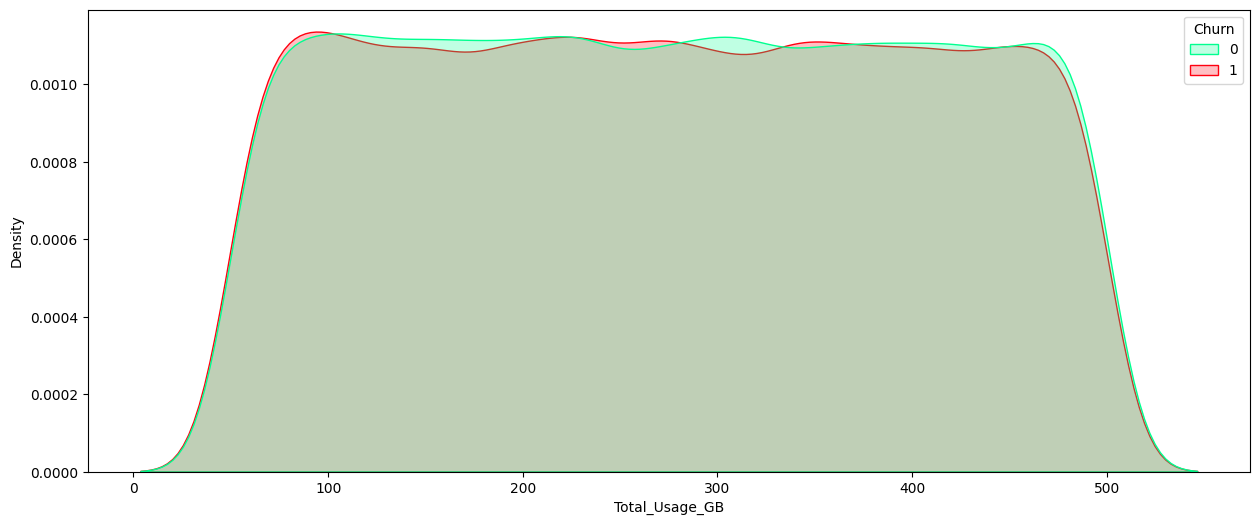

In [36]:
plot_kde(x_train_vis, "Total_Usage_GB")


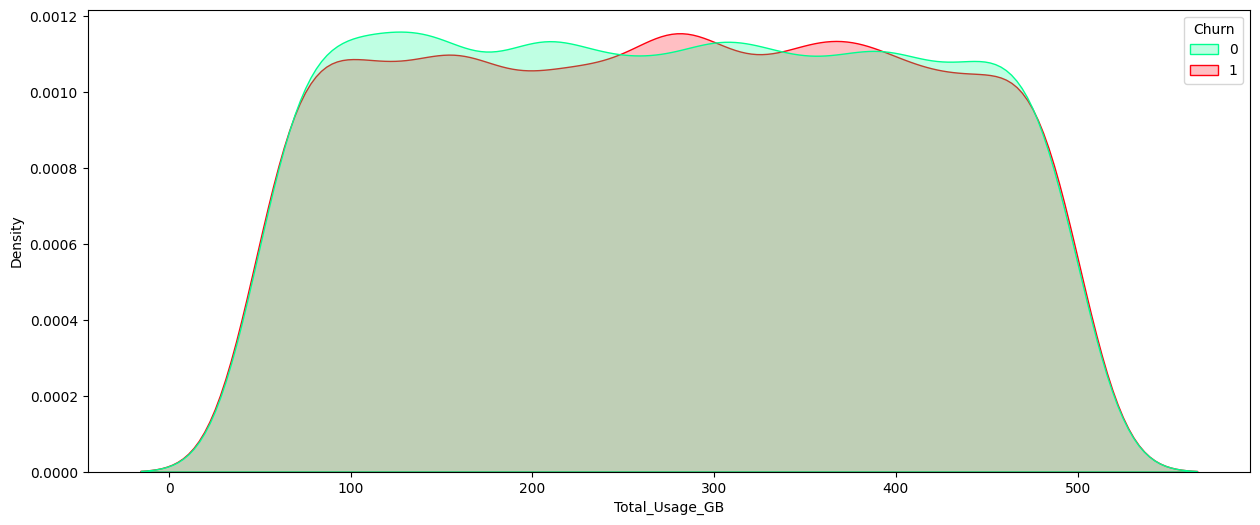

In [37]:
plot_kde(x_test_vis, "Total_Usage_GB")


# Monthly bills of the customers 

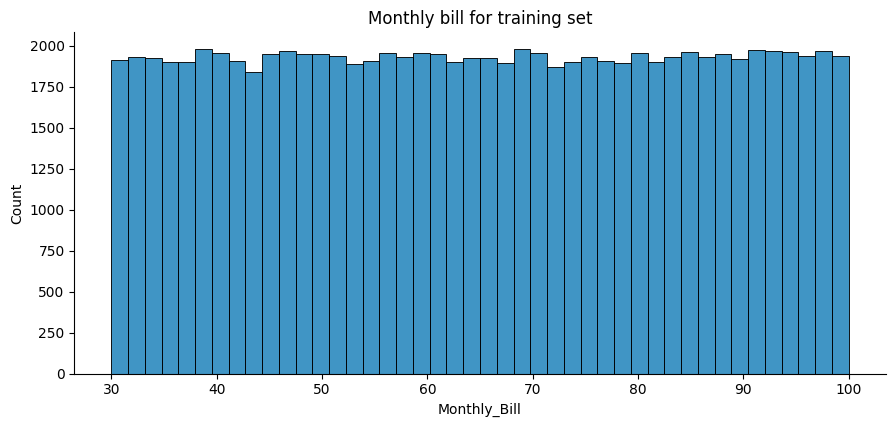

In [38]:

sns.displot(x_train["Monthly_Bill"])
plt.gcf().set_size_inches(10, 4)

plt.title('Monthly bill for training set' )

plt.show()

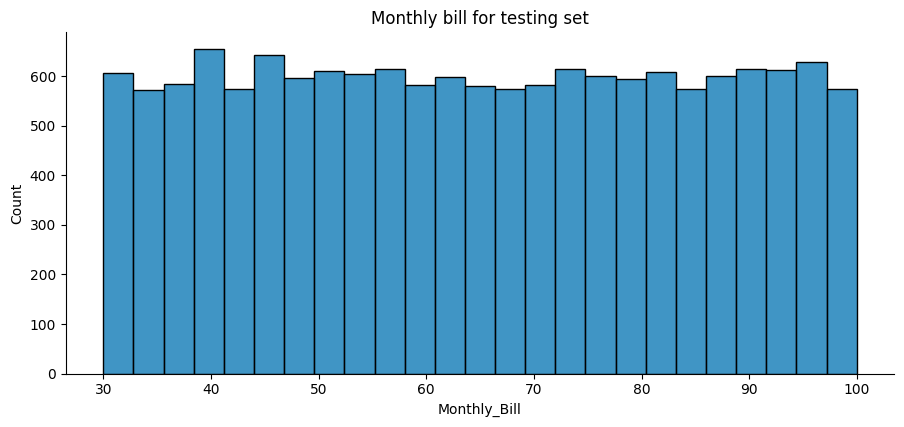

In [39]:
sns.displot(x_test["Monthly_Bill"])
plt.gcf().set_size_inches(10, 4)

plt.title('Monthly bill for testing set' )

plt.show()

/var/folders/3q/txm7h4896k7f8pcsm9l619lh0000gn/T/ipykernel_35184/338372434.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train["Monthly_Bill"])
/var/folders/3q/txm7h4896k7f8pcsm9l619lh0000gn/T/ipykernel_35184/338372434.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_test["Monthly_B

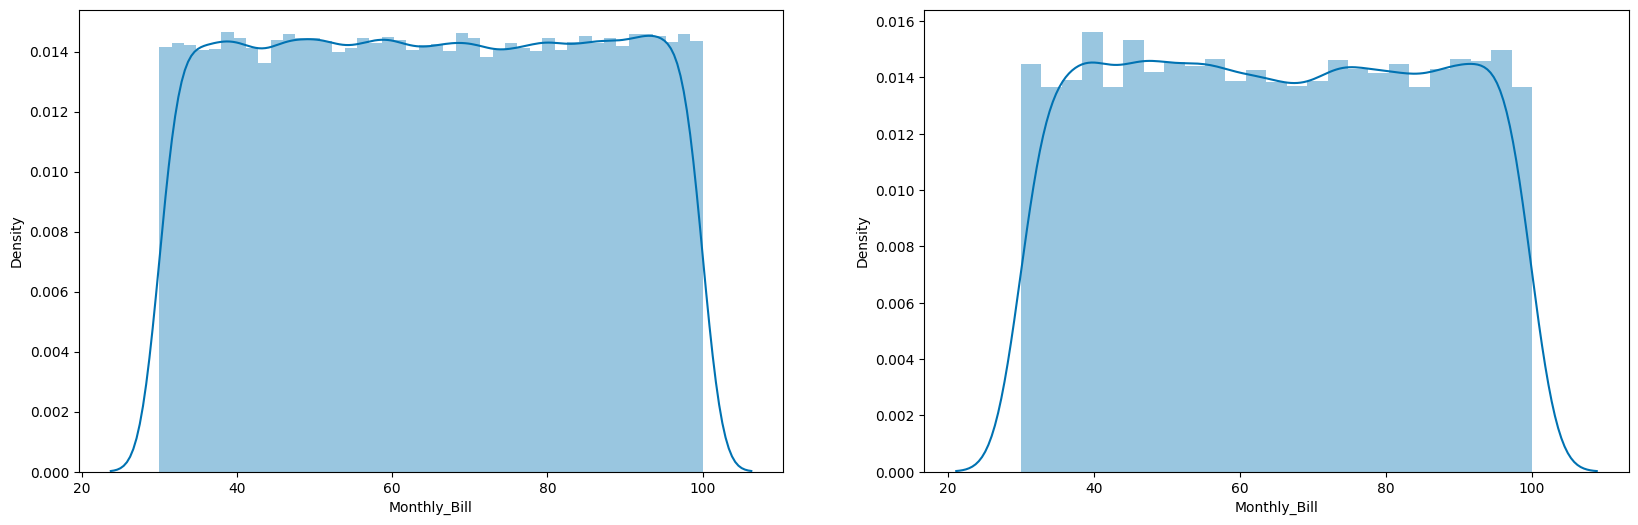

In [40]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(x_train["Monthly_Bill"])

plt.subplot(1,2,2)
sns.distplot(x_test["Monthly_Bill"])
plt.show()

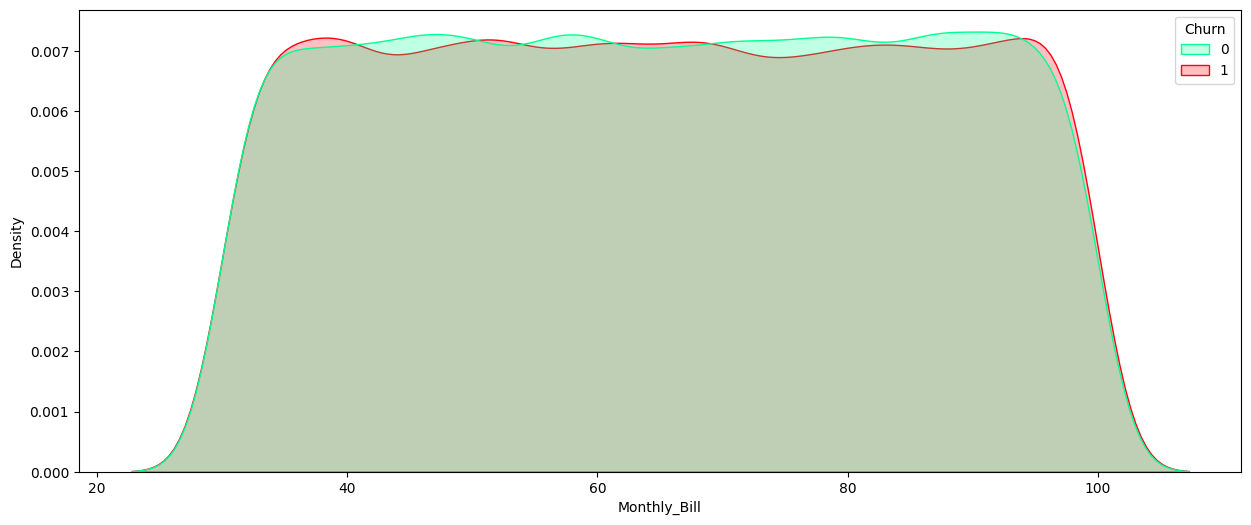

In [41]:
plot_kde(x_train_vis, "Monthly_Bill")


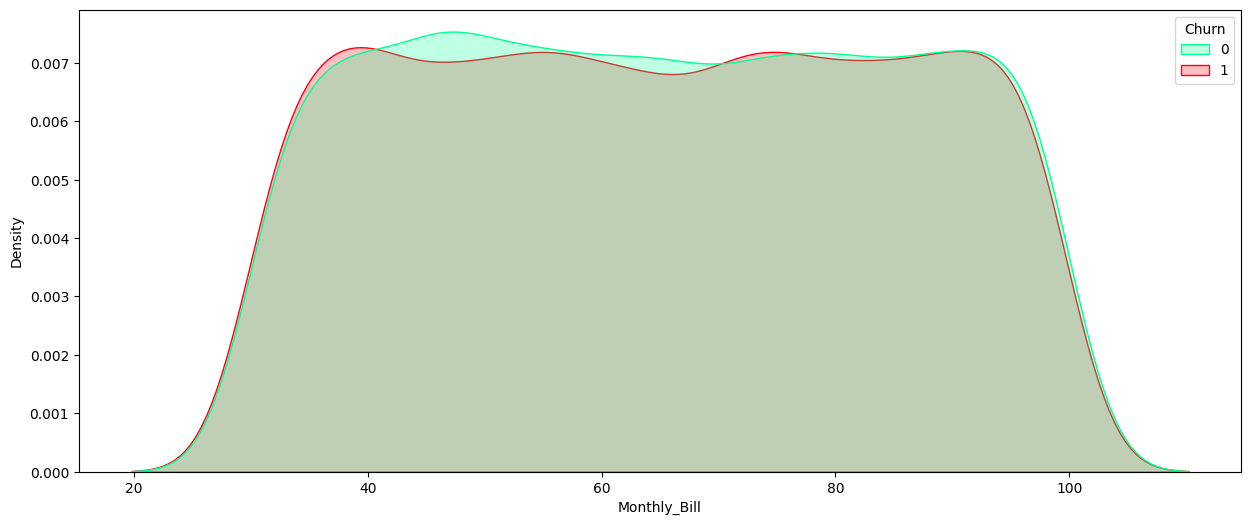

In [42]:
plot_kde(x_test_vis, "Monthly_Bill")


### We can see that these distributions plotted above are similar to each other and uniformly distributed (Montly bills and Data usage)

### We delete the redundant data which might not make a lot of sense while predicting the churn for a customer like thier name and id

In [43]:
del x_train["CustomerID"]
del x_test["CustomerID"]


del x_train["Name"]
del x_test["Name"]

In [44]:
# print(x_train.dtypes)
# print()
# print(x_test.dtypes)

# Feature engineering 

### We can see that most of the numeric features are uniformaly distributed across the 2 classes, so we can make a few categories to make use of these features effectively.

### Categorizing age distribution

In [45]:
x_train["Age"].min(), x_train["Age"].max()

(18, 70)

In [271]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236
1,2,Customer_2,62,Female,New York,1,48.76,172
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460
3,4,Customer_4,36,Female,Miami,3,97.94,297
4,5,Customer_5,46,Female,Miami,19,58.14,266
...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226
99996,99997,Customer_99997,62,Female,New York,19,61.65,351
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251
99998,99999,Customer_99999,51,Female,New York,20,49.25,434


In [272]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB'],
      dtype='object')

In [46]:
x_train['Age_group'] = None
x_train.loc[x_train['Age']<24,'Age_group']='<24'
x_train.loc[(x_train['Age']>=24) & (x_train['Age']<36),'Age_group']='24-36'
x_train.loc[(x_train['Age']>=36) & (x_train['Age']<48),'Age_group']='36-48'
x_train.loc[(x_train['Age']>=48) & (x_train['Age']<60),'Age_group']='48-60'
x_train.loc[x_train['Age']>=60,'Age_group']='60+'


In [47]:
x_test['Age_group'] = None
x_test.loc[x_test['Age']<24,'Age_group']='<24'
x_test.loc[(x_test['Age']>=24) & (x_test['Age']<36),'Age_group']='24-36'
x_test.loc[(x_test['Age']>=36) & (x_test['Age']<48),'Age_group']='36-48'
x_test.loc[(x_test['Age']>=48) & (x_test['Age']<60),'Age_group']='48-60'
x_test.loc[x_test['Age']>=60,'Age_group']='60+'

In [48]:
x_train_vis['Age_group'] = None
x_train_vis.loc[x_train_vis['Age']<24,'Age_group']='<24'
x_train_vis.loc[(x_train_vis['Age']>=24) & (x_train_vis['Age']<36),'Age_group']='24-36'
x_train_vis.loc[(x_train_vis['Age']>=36) & (x_train_vis['Age']<48),'Age_group']='36-48'
x_train_vis.loc[(x_train_vis['Age']>=48) & (x_train_vis['Age']<60),'Age_group']='48-60'
x_train_vis.loc[x_train_vis['Age']>=60,'Age_group']='60+'

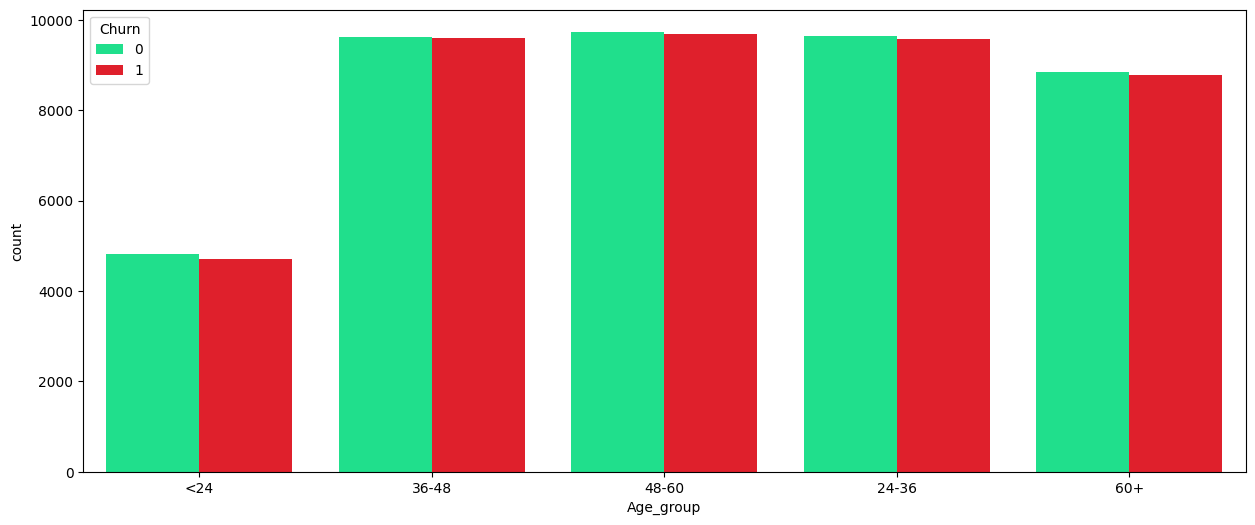

In [49]:
custom_palette = ["#00FF90", "#FF0010"] 

plt.figure(figsize=(15, 6))
sns.countplot(data=x_train_vis, x="Age_group", hue="Churn", palette=custom_palette)
plt.show()

### Categorizing the total data usage

In [50]:
x_train["Total_Usage_GB"].min(), x_train["Total_Usage_GB"].max()

(50, 500)

In [51]:
x_train['Total_Usage_GB_cat'] = None
x_train.loc[x_train['Total_Usage_GB']<= 100,'Total_Usage_GB_cat']='0-100'
x_train.loc[(x_train['Total_Usage_GB']> 100) & (x_train['Total_Usage_GB']<=200),'Total_Usage_GB_cat']='100-200'
x_train.loc[(x_train['Total_Usage_GB']> 200) & (x_train['Total_Usage_GB']<=300),'Total_Usage_GB_cat']='200-300'
x_train.loc[(x_train['Total_Usage_GB']> 300) & (x_train['Total_Usage_GB']<=400),'Total_Usage_GB_cat']='300-400'
x_train.loc[(x_train['Total_Usage_GB']> 400) & (x_train['Total_Usage_GB']<=500),'Total_Usage_GB_cat']='400-500'
x_train.loc[(x_train['Total_Usage_GB']> 500),'Total_Usage_GB_cat']='500+'


In [52]:
x_test['Total_Usage_GB_cat'] = None
x_test.loc[x_test['Total_Usage_GB']<= 100,'Total_Usage_GB_cat']='0-100'
x_test.loc[(x_test['Total_Usage_GB']> 100) & (x_test['Total_Usage_GB']<=200),'Total_Usage_GB_cat']='100-200'
x_test.loc[(x_test['Total_Usage_GB']> 200) & (x_test['Total_Usage_GB']<=300),'Total_Usage_GB_cat']='200-300'
x_test.loc[(x_test['Total_Usage_GB']> 300) & (x_test['Total_Usage_GB']<=400),'Total_Usage_GB_cat']='300-400'
x_test.loc[(x_test['Total_Usage_GB']> 400) & (x_test['Total_Usage_GB']<=500),'Total_Usage_GB_cat']='400-500'
x_test.loc[(x_test['Total_Usage_GB']> 500),'Total_Usage_GB_cat']='500+'

In [53]:
x_train_vis['Total_Usage_GB_cat'] = None
x_train_vis.loc[x_train_vis['Total_Usage_GB']<= 100,'Total_Usage_GB_cat']='0-100'
x_train_vis.loc[(x_train_vis['Total_Usage_GB']> 100) & (x_train_vis['Total_Usage_GB']<=200),'Total_Usage_GB_cat']='100-200'
x_train_vis.loc[(x_train_vis['Total_Usage_GB']> 200) & (x_train_vis['Total_Usage_GB']<=300),'Total_Usage_GB_cat']='200-300'
x_train_vis.loc[(x_train_vis['Total_Usage_GB']> 300) & (x_train_vis['Total_Usage_GB']<=400),'Total_Usage_GB_cat']='300-400'
x_train_vis.loc[(x_train_vis['Total_Usage_GB']> 400) & (x_train_vis['Total_Usage_GB']<=500),'Total_Usage_GB_cat']='400-500'
x_train_vis.loc[(x_train_vis['Total_Usage_GB']> 500),'Total_Usage_GB_cat']='500+'

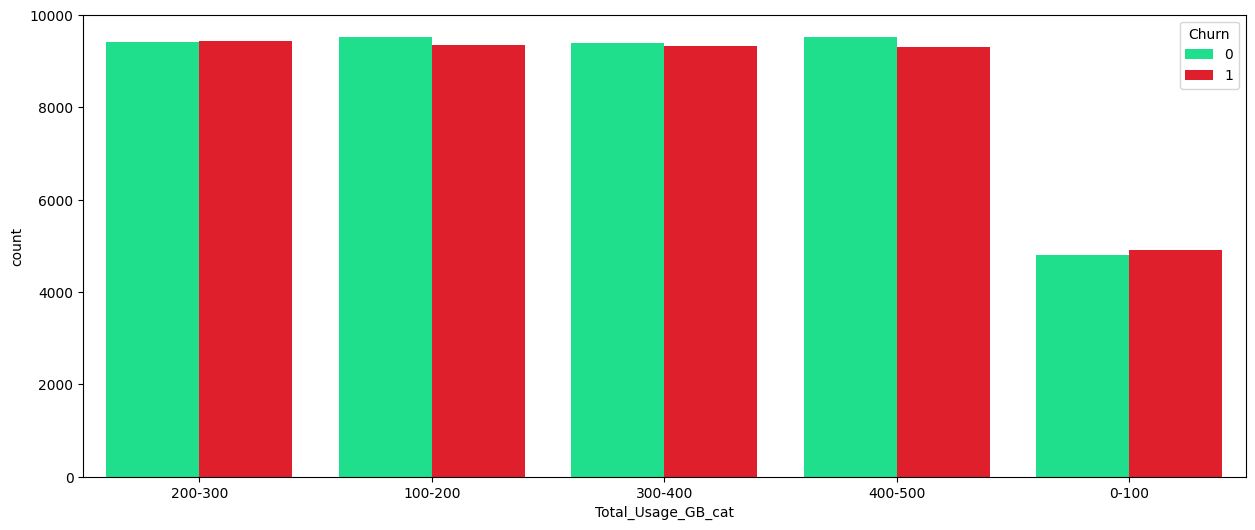

In [54]:
custom_palette = ["#00FF90", "#FF0010"] 

plt.figure(figsize=(15, 6))
sns.countplot(data=x_train_vis, x="Total_Usage_GB_cat", hue="Churn", palette=custom_palette)
plt.show()

### Categorizing the monthly bill usage

In [55]:
x_train["Monthly_Bill"].min(), x_train["Monthly_Bill"].max()

(30.0, 100.0)

In [56]:

x_train['Monthly_Bill_cat'] = None

x_train.loc[(x_train['Monthly_Bill']>= 0) & (x_train['Monthly_Bill']<40),'Monthly_Bill_cat']='<40'
x_train.loc[(x_train['Monthly_Bill']>= 40) & (x_train['Monthly_Bill']< 60),'Monthly_Bill_cat']='40-60'
x_train.loc[(x_train['Monthly_Bill']>= 60) & (x_train['Monthly_Bill']< 80),'Monthly_Bill_cat']='60-80'
x_train.loc[(x_train['Monthly_Bill']>= 80),'Monthly_Bill_cat']='80+'

In [270]:
df["Age"].describe()

count    100000.000000
mean         44.027020
std          15.280283
min          18.000000
25%          31.000000
50%          44.000000
75%          57.000000
max          70.000000
Name: Age, dtype: float64

In [57]:
x_test['Monthly_Bill_cat'] = None

x_test.loc[(x_test['Monthly_Bill']>= 0) & (x_test['Monthly_Bill']<40),'Monthly_Bill_cat']='<40'
x_test.loc[(x_test['Monthly_Bill']>= 40) & (x_test['Monthly_Bill']< 60),'Monthly_Bill_cat']='40-60'
x_test.loc[(x_test['Monthly_Bill']>= 60) & (x_test['Monthly_Bill']< 80),'Monthly_Bill_cat']='60-80'
x_test.loc[(x_test['Monthly_Bill']>= 80),'Monthly_Bill_cat']='80+'

In [58]:
x_train_vis['Monthly_Bill_cat'] = None

x_train_vis.loc[(x_train_vis['Monthly_Bill']>= 0) & (x_train_vis['Monthly_Bill']<40),'Monthly_Bill_cat']='<40'
x_train_vis.loc[(x_train_vis['Monthly_Bill']>= 40) & (x_train_vis['Monthly_Bill']< 60),'Monthly_Bill_cat']='40-60'
x_train_vis.loc[(x_train_vis['Monthly_Bill']>= 60) & (x_train_vis['Monthly_Bill']< 80),'Monthly_Bill_cat']='60-80'
x_train_vis.loc[(x_train_vis['Monthly_Bill']>= 80),'Monthly_Bill_cat']='80+'

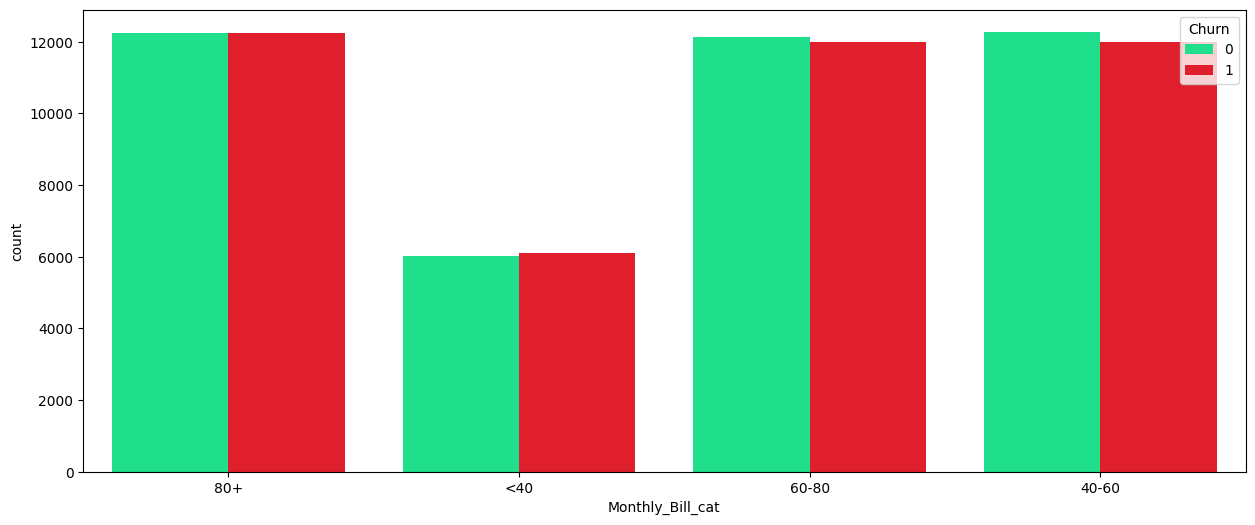

In [59]:
custom_palette = ["#00FF90", "#FF0010"] 

plt.figure(figsize=(15, 6))
sns.countplot(data=x_train_vis, x="Monthly_Bill_cat", hue="Churn", palette=custom_palette)
plt.show()

In [60]:
x_train

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Age_group,Total_Usage_GB_cat,Monthly_Bill_cat
33691,19,1,1,9,99.83,294,<24,200-300,80+
32504,38,1,2,24,36.04,251,36-48,200-300,<40
40182,43,1,3,12,38.68,112,36-48,100-200,<40
52531,59,2,4,15,68.57,180,48-60,100-200,60-80
36064,18,1,3,1,55.84,140,<24,100-200,40-60
...,...,...,...,...,...,...,...,...,...
50893,38,1,5,6,99.62,196,36-48,100-200,80+
62586,37,1,2,2,39.69,429,36-48,400-500,<40
8243,67,2,5,11,31.05,292,60+,200-300,<40
8823,45,2,2,16,34.58,355,36-48,300-400,<40


In [61]:
x_train["Subscription_Length_Months"].min(), x_train["Subscription_Length_Months"].max()

(1, 24)

In [62]:

x_train['SLM_cat'] = None

x_train.loc[(x_train['Subscription_Length_Months']>= 0) & (x_train['Subscription_Length_Months']<5),'SLM_cat']='<5'
x_train.loc[(x_train['Subscription_Length_Months']>= 5) & (x_train['Subscription_Length_Months']< 10),'SLM_cat']='5-10'
x_train.loc[(x_train['Subscription_Length_Months']>= 10) & (x_train['Subscription_Length_Months']< 15),'SLM_cat']='10-15'
x_train.loc[(x_train['Subscription_Length_Months']>= 15) & (x_train['Subscription_Length_Months']< 20),'SLM_cat']='15-20'
x_train.loc[(x_train['Subscription_Length_Months']>= 20),'SLM_cat']='20+'

In [63]:

x_test['SLM_cat'] = None

x_test.loc[(x_test['Subscription_Length_Months']>= 0) & (x_test['Subscription_Length_Months']<5),'SLM_cat']='<5'
x_test.loc[(x_test['Subscription_Length_Months']>= 5) & (x_test['Subscription_Length_Months']< 10),'SLM_cat']='5-10'
x_test.loc[(x_test['Subscription_Length_Months']>= 10) & (x_test['Subscription_Length_Months']< 15),'SLM_cat']='10-15'
x_test.loc[(x_test['Subscription_Length_Months']>= 15) & (x_test['Subscription_Length_Months']< 20),'SLM_cat']='15-20'
x_test.loc[(x_test['Subscription_Length_Months']>= 20),'SLM_cat']='20+'

In [64]:

x_train_vis['SLM_cat'] = None

x_train_vis.loc[(x_train_vis['Subscription_Length_Months']>= 0) & (x_train_vis['Subscription_Length_Months']<5),'SLM_cat']='<5'
x_train_vis.loc[(x_train_vis['Subscription_Length_Months']>= 5) & (x_train_vis['Subscription_Length_Months']< 10),'SLM_cat']='5-10'
x_train_vis.loc[(x_train_vis['Subscription_Length_Months']>= 10) & (x_train_vis['Subscription_Length_Months']< 15),'SLM_cat']='10-15'
x_train_vis.loc[(x_train_vis['Subscription_Length_Months']>= 15) & (x_train_vis['Subscription_Length_Months']< 20),'SLM_cat']='15-20'
x_train_vis.loc[(x_train_vis['Subscription_Length_Months']>= 20),'SLM_cat']='20+'

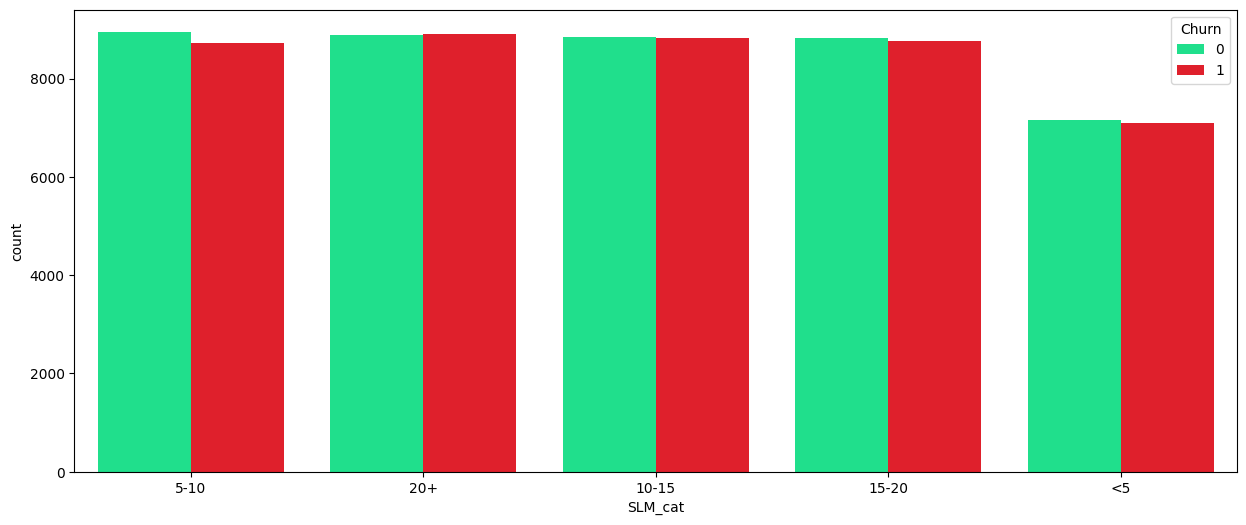

In [65]:
custom_palette = ["#00FF90", "#FF0010"] 

plt.figure(figsize=(15, 6))
sns.countplot(data=x_train_vis, x="SLM_cat", hue="Churn", palette=custom_palette)
plt.show()

In [66]:
# x_train

In [67]:
age_group_dict = encode_to_int(list(x_train["Age_group"].unique()))

def age_group(s):
    return age_group_dict[s]

x_train["Age_group"] = x_train["Age_group"].apply(age_group)

inv_age_group_dict = {v: k for k, v in age_group_dict.items()}

x_test["Age_group"] = x_test["Age_group"].apply(age_group)

In [276]:
slm_dict

{'5-10': 1, '20+': 2, '10-15': 3, '15-20': 4, '<5': 5}

In [68]:
tot_usg_dict = encode_to_int(list(x_train["Total_Usage_GB_cat"].unique()))

def tot_usg(s):
    return tot_usg_dict[s]

x_train["Total_Usage_GB_cat"] = x_train["Total_Usage_GB_cat"].apply(tot_usg)

inv_tot_usg_dict = {v: k for k, v in tot_usg_dict.items()}

x_test["Total_Usage_GB_cat"] = x_test["Total_Usage_GB_cat"].apply(tot_usg)

In [69]:
monthbill_dict = encode_to_int(list(x_train["Monthly_Bill_cat"].unique()))

def monthbill(s):
    return monthbill_dict[s]

x_train["Monthly_Bill_cat"] = x_train["Monthly_Bill_cat"].apply(monthbill)

inv_monthbill_dict = {v: k for k, v in monthbill_dict.items()}

x_test["Monthly_Bill_cat"] = x_test["Monthly_Bill_cat"].apply(monthbill)

In [70]:
slm_dict = encode_to_int(list(x_train["SLM_cat"].unique()))

def slm(s):
    return slm_dict[s]

x_train["SLM_cat"] = x_train["SLM_cat"].apply(slm)

inv_slm_dict = {v: k for k, v in slm_dict.items()}

x_test["SLM_cat"] = x_test["SLM_cat"].apply(slm)

# Detecting outliers 

### We have seen that most of the data was uniformly distributed, so there might not be any outliers

In [71]:
from sklearn.cluster import DBSCAN

In [72]:
x_train_arr = np.array(x_train)
x_test_arr = np.array(x_train)
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)

print(x_train_arr.shape, y_train_arr.shape)
print(x_test_arr.shape, y_test_arr.shape)


(85000, 10) (85000,)
(85000, 10) (15000,)


In [73]:
# x_train_arr_arr

x_train_numeric = np.array([x_train_arr[:,0], x_train_arr[:,3],x_train_arr[:,4],x_train_arr[:,5]])
x_train_numeric = x_train_numeric.T

In [74]:
x_test_numeric = np.array([x_test_arr[:,0], x_test_arr[:,3],x_test_arr[:,4],x_test_arr[:,5]])
x_test_numeric = x_test_numeric.T

In [75]:
# x_train

from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
x_train_numeric_sc = standard_scaler.fit_transform(x_train_numeric)

# x_test_sc = standard_scaler.transform(x_test)

In [76]:
x_train_numeric_sc.shape

(85000, 4)

In [77]:
db = DBSCAN(eps = 0.5 , min_samples=10).fit(x_train_numeric_sc)
labels = db.labels_

In [78]:
pd.Series(labels).value_counts()

0    85000
dtype: int64

### As expected, there are no outliers in our data

## Correlations between continous data features


In [79]:
df_continous = x_train[["Subscription_Length_Months", "Monthly_Bill", "Total_Usage_GB", "Age"]]
df_continous.describe()

,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Age
count,85000.000000,85000.000000,85000.000000,85000.000000
mean,12.487694,65.070022,274.633059,44.040576
std,6.932304,20.230250,130.477104,15.284609
min,1.000000,30.000000,50.000000,18.000000
25%,6.000000,47.560000,161.000000,31.000000
50%,13.000000,65.050000,274.000000,44.000000
75%,19.000000,82.652500,388.000000,57.000000
max,24.000000,100.000000,500.000000,70.000000


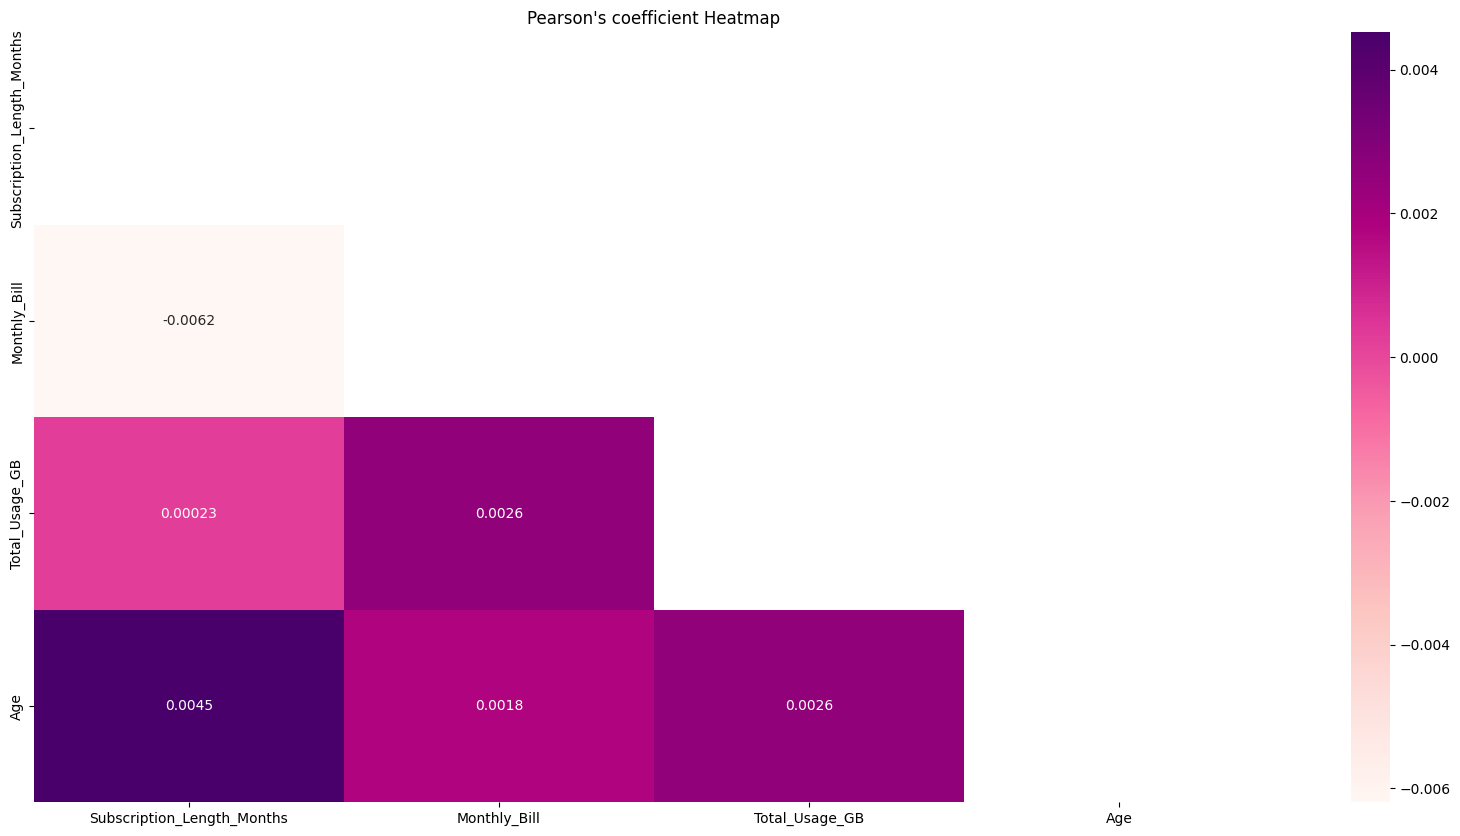

In [80]:
corr_matrix = df_continous.corr(method='pearson')

fig = plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='RdPu', mask=mask)
plt.title("Pearson's coefficient Heatmap")
plt.show()

#### Here, the correlation between the numeric features is very low, suggesting an independant set of features.

#### **As we constructed some categroical features with these continous data, we will just use them for the modelling part**

## Correlations between categorical data features


In [81]:
df_catergorical = x_train[['Age_group',
 'Monthly_Bill_cat',
 'Gender',
 'Total_Usage_GB_cat',
 'Location',
 'SLM_cat']]


In [82]:
from scipy.stats import chi2_contingency
from scipy import stats

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
    
    chi2 = stats.chi2_contingency(crosstab)[0]
    n = np.sum(crosstab)
    phi2 = chi2 / n
    
    r, k = crosstab.shape
    
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [83]:
rows = []

for var1 in df_catergorical:
    col = []
    for var2 in df_catergorical :
        cramers = cramers_V(df_catergorical[var1], df_catergorical[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
cramers_df = pd.DataFrame(cramers_results, columns = df_catergorical.columns, index =df_catergorical.columns)

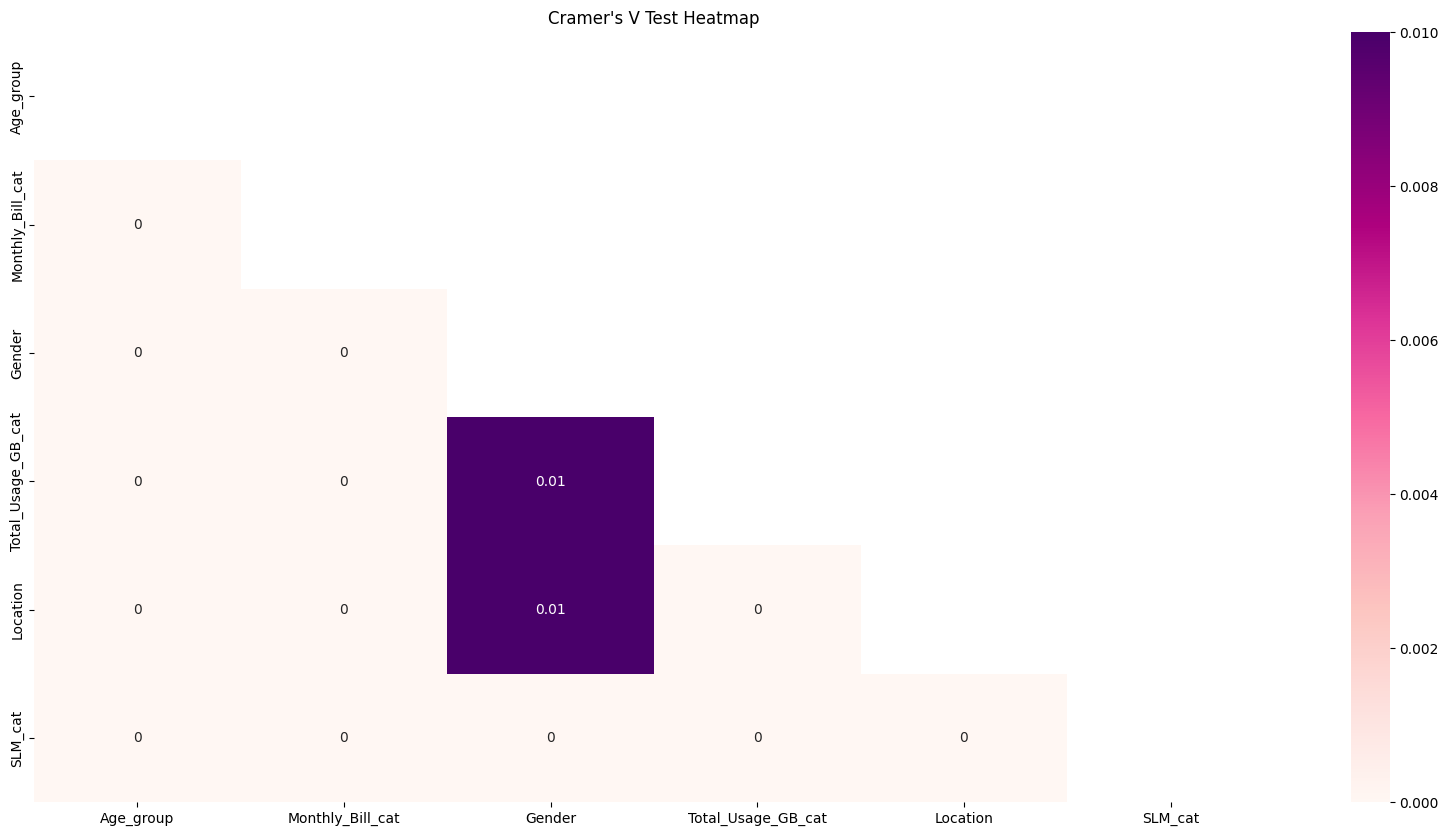

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named cramers_df

fig = plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(cramers_df, dtype=bool))
sns.heatmap(cramers_df, annot=True, cmap='RdPu', mask=mask)
plt.title("Cramer's V Test Heatmap")
plt.show()

### Similarly for the categorical features as well ,there seems to no relation betweem the features, considering the magnitude of the Cramer V scores

## Scaling the data we have and constructed 

In [85]:
# x_train_continous = x_train[["Subscription_Length_Months", "Monthly_Bill", "Total_Usage_GB", "Age"]]

# x_test_continous = x_test[["Subscription_Length_Months", "Monthly_Bill", "Total_Usage_GB", "Age"]]

In [86]:
# x_train_cat

In [87]:
x_train_cat = x_train[['Age_group',
 'Monthly_Bill_cat',
 'Gender',
 'Total_Usage_GB_cat',
 'Location',
 'SLM_cat']]



x_test_cat = x_test[['Age_group',
 'Monthly_Bill_cat',
 'Gender',
 'Total_Usage_GB_cat',
 'Location',
 'SLM_cat']]

In [88]:
# from sklearn import preprocessing

# standard_scaler = preprocessing.StandardScaler()
# x_train_continous_sc = standard_scaler.fit_transform(x_train_continous)
# x_test_continous_sc = standard_scaler.transform(x_test_continous)

In [89]:
# x_test_df = pd.concat([x_test_cat, x_test_continous_sc], axis = 1)


In [90]:

# x_train_df = pd.concat([x_train_cat, x_train_continous_sc])



# # df_continous = x_train[["Subscription_Length_Months", "Monthly_Bill", "Total_Usage_GB", "Age"]]

# # x_test_numeric = np.array([x_test_arr[:,0], x_test_arr[:,3],x_test_arr[:,4],x_test_arr[:,5]])
# # x_test_numeric = x_test_numeric.T

# # x_train_numeric = np.array([x_train_arr[:,0], x_train_arr[:,3],x_train_arr[:,4],x_train_arr[:,5]])
# # x_train_numeric = x_train_numeric.T


# # x_train_cat= np.array([x_train_arr[:,0], x_train_arr[:,3],x_train_arr[:,4],x_train_arr[:,5]])


In [284]:
x_train_cat

,Age_group,Monthly_Bill_cat,Gender,Total_Usage_GB_cat,Location,SLM_cat
33691,1,1,1,1,1,1
32504,2,2,1,1,2,2
40182,2,2,1,2,3,3
52531,3,3,2,2,4,4
36064,1,4,1,2,3,5
...,...,...,...,...,...,...
50893,2,1,1,2,5,1
62586,2,2,1,4,2,5
8243,5,2,2,1,5,3
8823,2,2,2,3,2,4


# Modelling for the given data

In [124]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,average_precision_score,f1_score


In [92]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [393]:
classifier = DecisionTreeClassifier()
param_grid = {
    'max_depth': [2,5,10,12,15],
    'min_samples_split': [5,10,20],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(x_train_cat, y_train)
# grid_search.fit(X_imputed_sc, Y)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ...................max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=2, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=2, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=2, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=2, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=2, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=2, min_samples_split=20; total time=   0.0s
[CV] END ..................max_depth=2, min_samp

In [394]:
classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [5,10,20,45,50,65,75,100],
    'max_depth': [2,5,10,15]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(x_train_cat, y_train)


# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................max_depth=2, n_estimators=5; total time=   0.1s
[CV] END ........................max_depth=2, n_estimators=5; total time=   0.1s
[CV] END ........................max_depth=2, n_estimators=5; total time=   0.1s
[CV] END ........................max_depth=2, n_estimators=5; total time=   0.1s
[CV] END ........................max_depth=2, n_estimators=5; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=20; total time=   0.2s
[CV] END .......................max_depth=2, n_

In [126]:
rc_cat = RandomForestClassifier(max_depth=2, n_estimators=10)

rc_cat.fit(x_train_cat, y_train)

RandomForestClassifier(max_depth=2, n_estimators=10)

In [285]:
x_test_cat

,Age_group,Monthly_Bill_cat,Gender,Total_Usage_GB_cat,Location,SLM_cat
20818,4,3,1,3,4,2
51366,4,2,1,4,3,5
61821,2,4,1,5,3,3
38292,4,1,2,4,3,2
36183,5,1,2,3,3,2
...,...,...,...,...,...,...
1110,3,4,1,3,3,4
18214,3,3,1,2,5,3
69487,1,3,2,4,2,4
43614,5,4,1,2,4,2


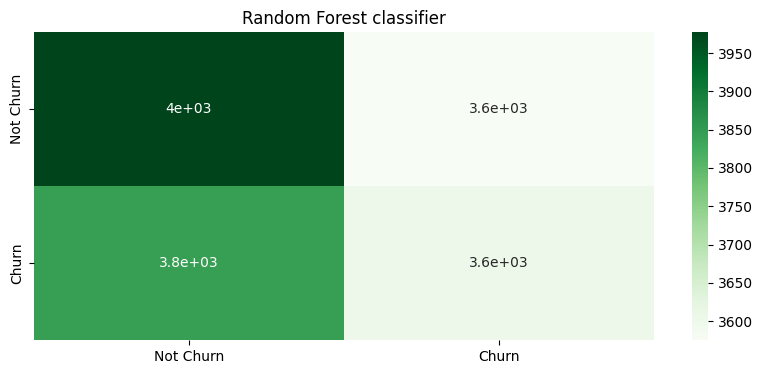

In [127]:
y_pred_rccat = rc_cat.predict(x_test_cat)

confusion_mat = confusion_matrix(y_test, y_pred_rccat)

plt.figure(figsize=(10,4))
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Random Forest classifier")
sns.heatmap(confusion_mat, annot=True, cmap="Greens", xticklabels = ["Not Churn","Churn"],
           yticklabels=["Not Churn","Churn"])
plt.show()

In [129]:
print(classification_report(y_test, y_pred_rccat))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52      7552
           1       0.50      0.48      0.49      7448

    accuracy                           0.51     15000
   macro avg       0.51      0.51      0.51     15000
weighted avg       0.51      0.51      0.51     15000



In [283]:
import pickle 

pickle.dump(rc_cat, open('rc_cat.pkl', 'wb'))


In [396]:
import xgboost as xgb
import lightgbm as lgb

xgb_classifier = xgb.XGBClassifier()

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'max_depth': [2,5],
    'learning_rate': [0.1,0.01],
    'n_estimators': [100,200,500],
    'reg_alpha':[0.1,0.5]
}

xgb_grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=xgb_param_grid, cv=5, verbose=2)
xgb_grid_search.fit(x_train_cat, y_train)

print("XGBoost - Best Parameters:", xgb_grid_search.best_params_)
print("XGBoost - Best Score:", xgb_grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.1; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.1; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.1; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.1; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.1; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.5; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.5; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.5; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.5; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.5; total time=   0.5s
[CV] END

In [405]:
lgb_classifier = lgb.LGBMClassifier()

# Define the parameter grid for LightGBM
lgb_param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.5],
    'n_estimators': [300,400]
}

# Perform grid search with cross-validation for LightGBM
lgb_grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=lgb_param_grid, cv=5, verbose=2)
lgb_grid_search.fit(x_train_cat, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=400; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=400; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=400; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=400; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=400; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=300; total time=   1.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_es

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.5], 'max_depth': [3, 4, 5],
                         'n_estimators': [300, 400]},
             verbose=2)

In [406]:
print("LightGBM - Best Parameters:", lgb_grid_search.best_params_)
print("LightGBM - Best Score:", lgb_grid_search.best_score_)

LightGBM - Best Parameters: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 300}
LightGBM - Best Score: 0.5014588235294117


In [408]:
log_regr_classifier = LogisticRegression()

# Define the parameter grid for LightGBM
logregr_param_grid = {
    'C': [1, 0.01, 10],
    'max_iter': [100, 500, 1000],
}

# Perform grid search with cross-validation for LightGBM
logregr_grid_search = GridSearchCV(estimator=log_regr_classifier, param_grid=logregr_param_grid, cv=5, verbose=2)
logregr_grid_search.fit(x_train_cat, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..................................C=1, max_iter=100; total time=   0.4s
[CV] END ..................................C=1, max_iter=100; total time=   0.1s
[CV] END ..................................C=1, max_iter=100; total time=   0.2s
[CV] END ..................................C=1, max_iter=100; total time=   0.1s
[CV] END ..................................C=1, max_iter=100; total time=   0.2s
[CV] END ..................................C=1, max_iter=500; total time=   0.1s
[CV] END ..................................C=1, max_iter=500; total time=   0.2s
[CV] END ..................................C=1, max_iter=500; total time=   0.1s
[CV] END ..................................C=1, max_iter=500; total time=   0.1s
[CV] END ..................................C=1, max_iter=500; total time=   0.1s
[CV] END .................................C=1, max_iter=1000; total time=   0.2s
[CV] END .................................C=1, ma

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 0.01, 10], 'max_iter': [100, 500, 1000]},
             verbose=2)

In [409]:
print("Logistic regression - Best Parameters:", logregr_grid_search.best_params_)
print("Logistic regression - Best Score:", logregr_grid_search.best_score_)

Logistic regression - Best Parameters: {'C': 1, 'max_iter': 100}
Logistic regression - Best Score: 0.5010235294117648


### We can see that the scores are not satisifactory, this might be due to the uniform distribution of data across all features

### Also we didn't consider the numeric features in this modelling, now we'll try to do some more feature engineering.

In [93]:
x_train_vis["Age**2"] = x_train_vis["Age"]**2

# del df_continous["Age**2"]

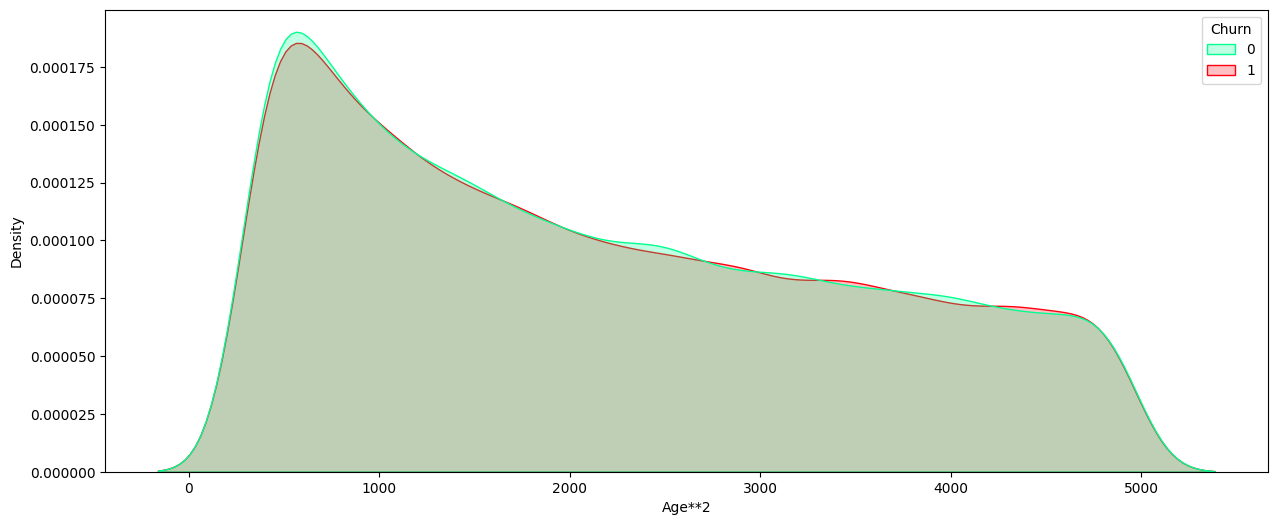

/var/folders/3q/txm7h4896k7f8pcsm9l619lh0000gn/T/ipykernel_35184/3993136043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continous["Age**2"] = df_continous["Age"]**2


In [94]:
plot_kde(x_train_vis, "Age**2")

df_continous["Age**2"] = df_continous["Age"]**2

In [95]:
x_train_vis["Age*SLM"] = x_train_vis["Age"]**2

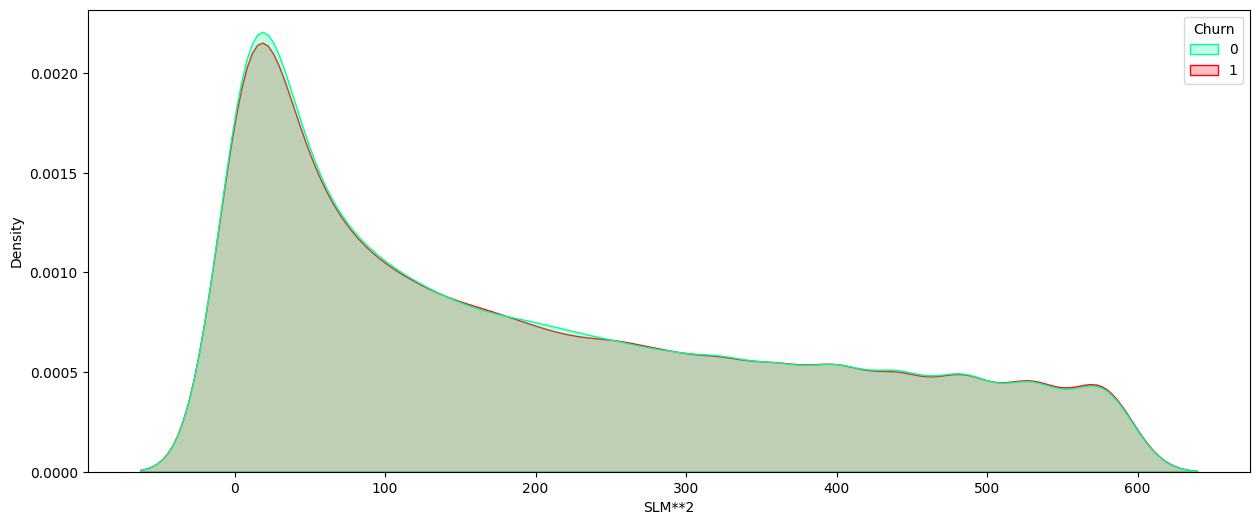

In [96]:
# Subscription_Length_Months

x_train_vis["SLM**2"] = x_train_vis["Subscription_Length_Months"]**2

plot_kde(x_train_vis, "SLM**2")


In [97]:
df_continous["SLM**2"] = df_continous["Subscription_Length_Months"]**2

/var/folders/3q/txm7h4896k7f8pcsm9l619lh0000gn/T/ipykernel_35184/704929000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continous["SLM**2"] = df_continous["Subscription_Length_Months"]**2


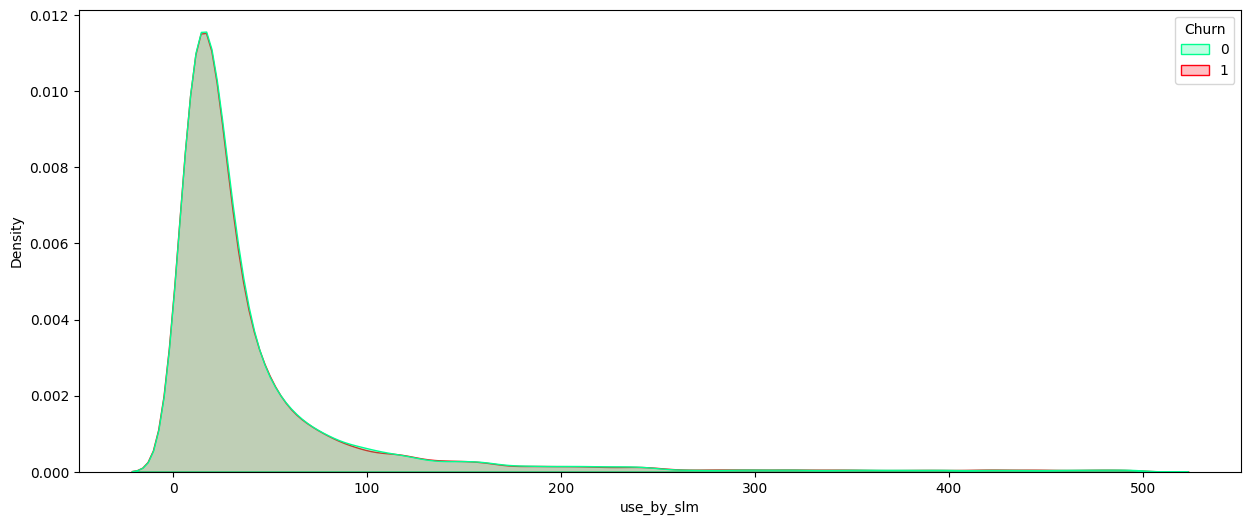

/var/folders/3q/txm7h4896k7f8pcsm9l619lh0000gn/T/ipykernel_35184/946309981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continous["use_by_slm"] = df_continous["Total_Usage_GB"]/df_continous["Subscription_Length_Months"]


In [98]:
x_train_vis["use_by_slm"] = x_train_vis["Total_Usage_GB"]/x_train_vis["Subscription_Length_Months"]

plot_kde(x_train_vis, "use_by_slm")

df_continous["use_by_slm"] = df_continous["Total_Usage_GB"]/df_continous["Subscription_Length_Months"]


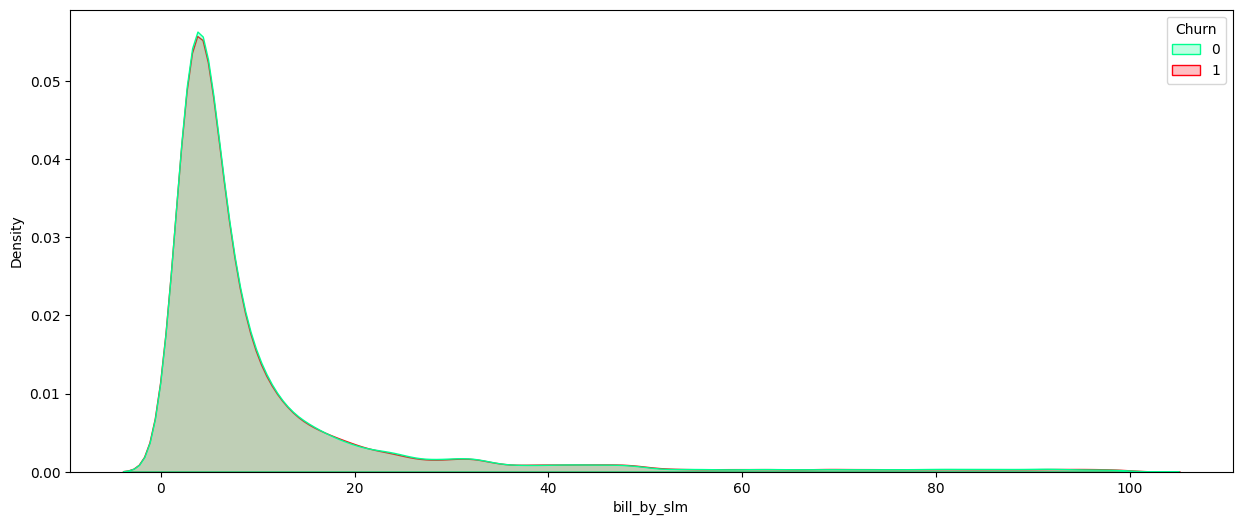

/var/folders/3q/txm7h4896k7f8pcsm9l619lh0000gn/T/ipykernel_35184/2929786725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continous["bill_by_slm"] = df_continous["Monthly_Bill"]/df_continous["Subscription_Length_Months"]


In [99]:
x_train_vis["bill_by_slm"] = x_train_vis["Monthly_Bill"]/x_train_vis["Subscription_Length_Months"]

plot_kde(x_train_vis, "bill_by_slm")

df_continous["bill_by_slm"] = df_continous["Monthly_Bill"]/df_continous["Subscription_Length_Months"]

In [100]:
df_continous.shape

(85000, 8)

In [101]:
x_train_numeric = np.array(df_continous)

In [102]:
x_test_continous = x_test[["Subscription_Length_Months", "Monthly_Bill", "Total_Usage_GB", "Age"]]

In [103]:
x_test_continous["Age**2"] = x_test_continous["Age"]**2
x_test_continous["SLM**2"] = x_test_continous["Subscription_Length_Months"]**2
x_test_continous["use_by_slm"] = x_test_continous["Total_Usage_GB"]/x_test_continous["Subscription_Length_Months"]
x_test_continous["bill_by_slm"] = x_test_continous["Monthly_Bill"]/x_test_continous["Subscription_Length_Months"]

/var/folders/3q/txm7h4896k7f8pcsm9l619lh0000gn/T/ipykernel_35184/633106292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_continous["Age**2"] = x_test_continous["Age"]**2
/var/folders/3q/txm7h4896k7f8pcsm9l619lh0000gn/T/ipykernel_35184/633106292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_continous["SLM**2"] = x_test_continous["Subscription_Length_Months"]**2
/var/folders/3q/txm7h4896k7f8pcsm9l619lh0000gn/T/ipykernel_35184/633106292.py:3: SettingWithCopyWarning: 
A value is trying

In [104]:
x_test_numeric = np.array(x_test_continous)

In [105]:
x_test_numeric.shape

(15000, 8)

In [282]:
# x_test_continous.columns, df_continous.columns

x_test_numeric

array([[ 20.        ,  79.39      , 318.        , ..., 400.        ,
         15.9       ,   3.9695    ],
       [  3.        ,  39.6       , 409.        , ...,   9.        ,
        136.33333333,  13.2       ],
       [ 12.        ,  58.36      ,  51.        , ..., 144.        ,
          4.25      ,   4.86333333],
       ...,
       [ 15.        ,  61.59      , 500.        , ..., 225.        ,
         33.33333333,   4.106     ],
       [ 21.        ,  44.05      , 173.        , ..., 441.        ,
          8.23809524,   2.09761905],
       [ 13.        ,  70.79      , 184.        , ..., 169.        ,
         14.15384615,   5.44538462]])

In [107]:
# x_train_numeric

# x_train_vis

In [277]:
from sklearn import preprocessing

standard_scaler_num = preprocessing.StandardScaler()
x_train_numeric_sc = standard_scaler_num.fit_transform(x_train_numeric)
x_test_numeric_sc = standard_scaler_num.transform(x_test_numeric)

In [281]:
from pickle import dump

dump(standard_scaler_num, open('scaler_numeric.pkl', 'wb'))


# joblib.dump(standard_scaler_num, scaler_filename)

In [109]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2, random_state=20)
# pca_result = pca.fit_transform(x_train_numeric_sc)

# custom_palette = sns.color_palette(['green', 'red'])

# plt.figure(figsize = (12,6))
# sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1] ,hue=x_train_vis["Churn"], palette=custom_palette, alpha = 0.5)
# plt.title("PCA Visualization of Entire Training data")
# plt.show()

In [491]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=66, perplexity=20, n_iter=300 , n_jobs=-1)

tsne_result = tsne.fit_transform(x_train_numeric_sc)

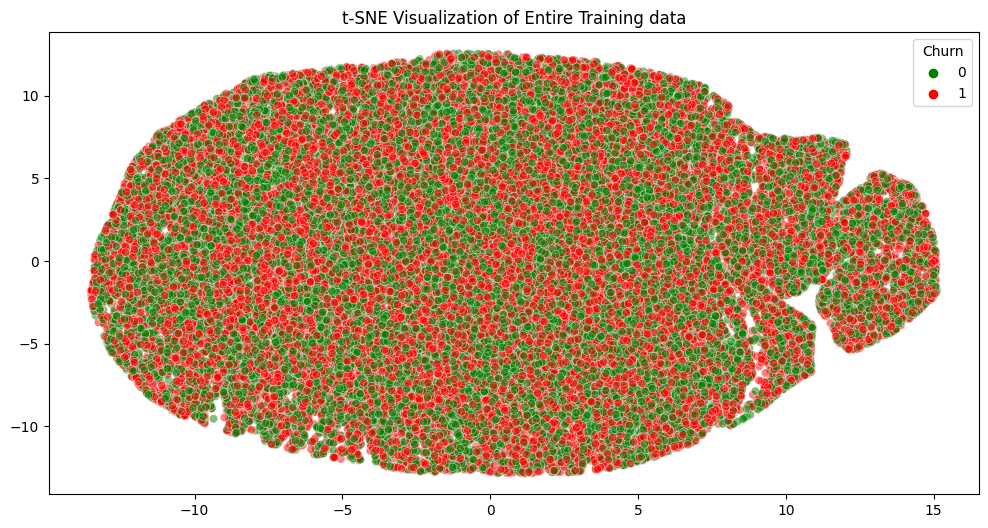

In [492]:
plt.figure(figsize = (12,6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=x_train_vis["Churn"], palette=custom_palette, alpha = 0.5)
plt.title("t-SNE Visualization of Entire Training data")
plt.show()

### Looks like the data given has a lot of overlap between the 2 classes! 

In [114]:
xgb_classifier_num = xgb.XGBClassifier()

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'max_depth': [2,5],
    'learning_rate': [0.1,0.01],
    'n_estimators': [100,250],
    'reg_alpha':[0.1,1]
}

xgb_grid_search = GridSearchCV(estimator=xgb_classifier_num, param_grid=xgb_param_grid, cv=5, verbose=2)
xgb_grid_search.fit(x_train_numeric, y_train)

print("XGBoost - Best Parameters:", xgb_grid_search.best_params_)
print("XGBoost - Best Score:", xgb_grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.1; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.1; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.1; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.1; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.1; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=1; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=1; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=1; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=1; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=1; total time=   1.0s
[CV] END learning_r

In [115]:
classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [5,10,20,45,50,65,75,100],
    'max_depth': [2,5,10,15]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(x_train_numeric, y_train)


# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................max_depth=2, n_estimators=5; total time=   0.1s
[CV] END ........................max_depth=2, n_estimators=5; total time=   0.1s
[CV] END ........................max_depth=2, n_estimators=5; total time=   0.1s
[CV] END ........................max_depth=2, n_estimators=5; total time=   0.1s
[CV] END ........................max_depth=2, n_estimators=5; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.2s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.2s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.2s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.2s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.2s
[CV] END .......................max_depth=2, n_estimators=20; total time=   0.4s
[CV] END .......................max_depth=2, n_

In [119]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,average_precision_score,f1_score


rc_num = RandomForestClassifier(max_depth = 15, n_estimators=100)
rc_num.fit(x_train_numeric_sc, y_train)

RandomForestClassifier(max_depth=15)

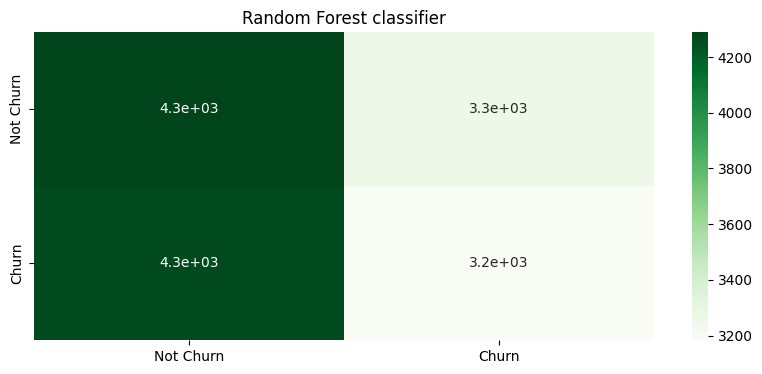

In [122]:
y_pred_rcnum = rc_num.predict(x_test_numeric_sc)

confusion_mat = confusion_matrix(y_test, y_pred_rcnum)

plt.figure(figsize=(10,4))
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Random Forest classifier")
sns.heatmap(confusion_mat, annot=True, cmap="Greens", xticklabels = ["Not Churn","Churn"],
           yticklabels=["Not Churn","Churn"])
plt.show()

In [123]:
print(classification_report(y_test, y_pred_rcnum))

              precision    recall  f1-score   support

           0       0.50      0.57      0.53      7552
           1       0.49      0.43      0.46      7448

    accuracy                           0.50     15000
   macro avg       0.50      0.50      0.50     15000
weighted avg       0.50      0.50      0.50     15000



## Training deep neural networks for the churn prediction

### Given this data, now we can be more cautious about those customers who will actually churn, i.e the **recall for churned customers** should be high as we can identify the potential customers

In [152]:
import torch
 
x_train_num_sc_tensor = torch.tensor(x_train_numeric_sc, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)

In [153]:
x_test_num_sc_tensor = torch.tensor(x_test_numeric_sc, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

In [213]:
import torch.nn as nn

class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(8, 64)
        self.relu = nn.ReLU()
        self.output = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

In [219]:
class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(8, 16)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(16, 32)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.sigmoid(self.output(x))
        return x

In [187]:
x_train_numeric.shape

(85000, 8)

In [220]:
# Compare model sizes
model1 = Model1()
model2 = Model2()
print(sum([x.reshape(-1).shape[0] for x in model1.parameters()]))  # 11161
print(sum([x.reshape(-1).shape[0] for x in model2.parameters()]))  # 11041

641
721


In [205]:
import copy
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm


def compute_f1_score(y_true, y_pred):
    # Calculate precision and recall
    true_positives = torch.sum(y_true * y_pred)
    predicted_positives = torch.sum(y_pred)
    actual_positives = torch.sum(y_true)

    precision = true_positives / (predicted_positives + 1e-8)
    recall = true_positives / (actual_positives + 1e-8)

    # Calculate F1 score
    f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
    
    return f1



def model_train(model, X_train, y_train, X_val, y_val):

    loss_fn = nn.BCELoss()  
    optimizer = optim.Adam(model.parameters(), lr=0.005)

    n_epochs = 50
    batch_size = 128
    batch_start = torch.arange(0, len(X_train), batch_size)

    best_f1 = - np.inf  
    best_weights = None

    for epoch in range(n_epochs):
        model.train()
        with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
            bar.set_description(f"Epoch {epoch}")
            for start in bar:

                X_batch = X_train[start:start+batch_size]
                y_batch = y_train[start:start+batch_size]

                y_pred = model(X_batch)
                loss = loss_fn(y_pred, y_batch)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                f1 = compute_f1_score(y_batch.squeeze(), (y_pred > 0.5).squeeze())

                bar.set_postfix(
                    loss=float(loss),
                    f1=float(f1)
                )
        # evaluate accuracy at end of each epoch
        model.eval()
        y_pred = model(X_val)

        # f1 = multiclass_f1_score(y_pred, y_val, num_classes=2, average="macro")
        f1 = compute_f1_score(y_val.squeeze(), (y_pred > 0.5).squeeze())

        if f1 > best_f1:
            best_f1 = f1
            best_weights = copy.deepcopy(model.state_dict())

    model.load_state_dict(best_weights)
    return best_f1

In [361]:
# define 5-fold cross validation test harness
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores = []
for train, test in kfold.split(x_train_num_sc_tensor, y_train_tensor):
    # create model, train, and get accuracy
    model = Model1()
    f1_score = model_train(model, x_train_num_sc_tensor[train], y_train_tensor[train], x_train_num_sc_tensor[test], y_train_tensor[test])
    print("f1_score (Model1): %.2f" % f1_score)
    cv_scores.append(f1_score)

f1_score (Model1): 0.59
f1_score (Model1): 0.56
f1_score (Model1): 0.55
f1_score (Model1): 0.61
f1_score (Model1): 0.59


In [363]:
f1_score = np.mean(cv_scores)
std = np.std(cv_scores)
print("Model1 f1_score: %.2f%% (+/- %.2f%%)" % (f1_score*100, std*100))

Model1 f1_score: 57.93% (+/- 2.01%)


In [221]:
# define 5-fold cross validation test harness
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores = []
for train, test in kfold.split(x_train_num_sc_tensor, y_train_tensor):
    # create model, train, and get accuracy
    model = Model2()
    f1_score = model_train(model, x_train_num_sc_tensor[train], y_train_tensor[train], x_train_num_sc_tensor[test], y_train_tensor[test])
    print("f1_score (Model2): %.2f" % f1_score)
    cv_scores.append(f1_score)

f1_score (Model2): 0.42
f1_score (Model2): 0.53
f1_score (Model2): 0.43
f1_score (Model2): 0.36
f1_score (Model2): 0.66


In [224]:
f1_score = np.mean(cv_scores)
std = np.std(cv_scores)
print("Model2 f1_score: %.2f%% (+/- %.2f%%)" % (f1_score*100, std*100))

Model2 f1_score: 48.06% (+/- 10.60%)


In [349]:
# !pip freeze >> requirements.txt

### We can see that the 1st model peforms better than the 2nd one, in terms of F1 score 

In [225]:
model = Model1()
f1_score = model_train(model, x_train_num_sc_tensor, y_train_tensor, x_test_num_sc_tensor, y_test_tensor)
print("f1_score (Model1): %.2f" % f1_score)

f1_score (Model1): 0.58


In [364]:
model.eval()
y_pred_m1 = model(x_test_num_sc_tensor)

y_pred_numpy1 = (y_pred_m1 > 0.5).squeeze().cpu().detach().numpy()
y_test_numpy = y_test_tensor.squeeze().cpu().detach().numpy()

# Calculate the classification report
report = classification_report(y_test_numpy, y_pred_numpy1)

# Print the classification report
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.51      0.27      0.35      7552
         1.0       0.50      0.73      0.59      7448

    accuracy                           0.50     15000
   macro avg       0.50      0.50      0.47     15000
weighted avg       0.50      0.50      0.47     15000



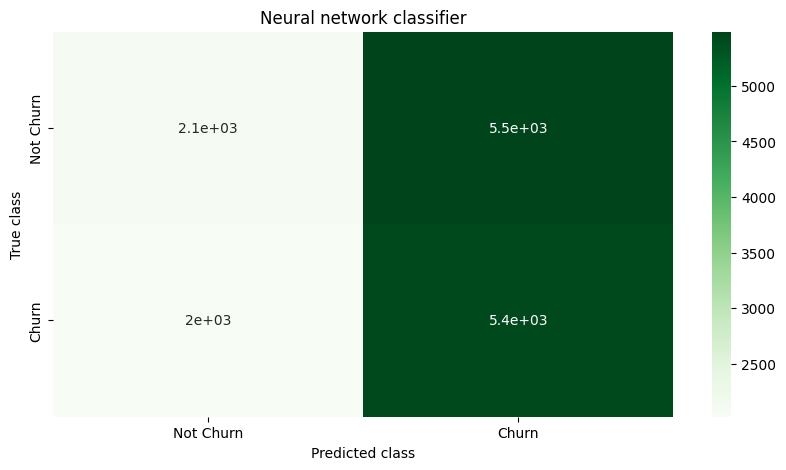

In [365]:
plt.figure(figsize=(10,5))

plt.title("Neural network classifier")

sns.heatmap(confusion_matrix(y_test_numpy, y_pred_numpy1)
            
, annot=True, cmap="Greens", xticklabels = ["Not Churn","Churn"],
           yticklabels=["Not Churn","Churn"])

plt.xlabel("Predicted class")
plt.ylabel("True class")

plt.show()

#### This model isn't great given the test accuracy, but it's predicting most of the samples to be churn. i.e it's able to predict about 71% of real churn samples.  But the accuracy suggests that the model is no good than a coin toss

In [250]:
model_save_path = 'customer_churn_model.pth'

# Save the model's state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to customer_churn_model.pth


### Using only the given data (no new features)

In [314]:
df_continous1 = df_continous[["Subscription_Length_Months", "Monthly_Bill", "Age", "Total_Usage_GB"]]

In [316]:
df_catergorical1 = df_catergorical[["Gender", "Location"]]

In [317]:
df_train_new = pd.concat([df_continous1, df_catergorical1],axis =  1)

In [321]:
x_test_cat1 = x_test_cat[["Gender", "Location"]]

x_test_continous1 = x_test_continous[["Subscription_Length_Months", "Monthly_Bill", "Age", "Total_Usage_GB"]]

In [324]:
df_test_new = pd.concat([x_test_continous1, x_test_cat1],axis =  1)

In [ ]:
x_test_cat1 = x_test_cat[["Gender", "Location"]]

x_test_continous1 = x_test_continous[["Subscription_Length_Months", "Monthly_Bill", "Age", "Total_Usage_GB"]]

df_test_new = pd.concat([x_test_continous1, x_test_cat1],axis =  1)

In [325]:
standard_scaler_all = preprocessing.StandardScaler()
x_train_all_sc = standard_scaler_all.fit_transform(df_train_new)
x_test_all_sc = standard_scaler_all.transform(df_test_new)

In [346]:
from pickle import dump

dump(standard_scaler_all, open('scaler_all.pkl', 'wb'))

In [329]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'max_depth': [2,5],
    'learning_rate': [0.1],
    'n_estimators': [100,200],
    'reg_alpha':[0.1]
}

xgb_grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=xgb_param_grid, cv=5, verbose=2)
xgb_grid_search.fit(x_train_all_sc, y_train)

print("XGBoost - Best Parameters:", xgb_grid_search.best_params_)
print("XGBoost - Best Score:", xgb_grid_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.1; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.1; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.1; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.1; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, reg_alpha=0.1; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=200, reg_alpha=0.1; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=200, reg_alpha=0.1; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=200, reg_alpha=0.1; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=200, reg_alpha=0.1; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=200, reg_alpha=0.1; total time=   1.1s
[CV] END l

In [332]:
xgb_classifier = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 200, reg_alpha = 0.1)

xgb_classifier.fit(x_train_all_sc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

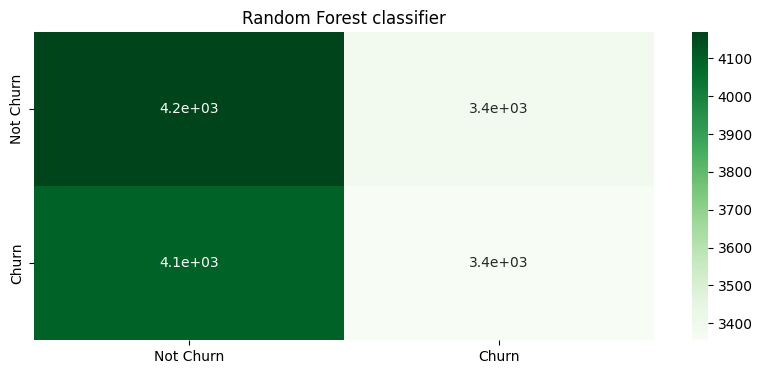

In [333]:
# x_test_all_sc

y_pred_all_xgb = xgb_classifier.predict(x_test_all_sc)

confusion_mat = confusion_matrix(y_test, y_pred_all_xgb)

plt.figure(figsize=(10,4))
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Random Forest classifier")
sns.heatmap(confusion_mat, annot=True, cmap="Greens", xticklabels = ["Not Churn","Churn"],
           yticklabels=["Not Churn","Churn"])
plt.show()

In [337]:
x_test_all_sc.shape

(15000, 6)

In [335]:
print(classification_report(y_test, y_pred_all_xgb))

              precision    recall  f1-score   support

           0       0.50      0.55      0.53      7552
           1       0.50      0.45      0.47      7448

    accuracy                           0.50     15000
   macro avg       0.50      0.50      0.50     15000
weighted avg       0.50      0.50      0.50     15000



In [341]:
class Model3(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(6, 64)
        self.relu = nn.ReLU()
        self.output = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

x_train_all_sc_tensor = torch.tensor(x_train_all_sc, dtype=torch.float32)
x_test_all_sc_tensor = torch.tensor(x_test_all_sc, dtype=torch.float32)


kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores = []
for train, test in kfold.split(x_train_all_sc_tensor, y_train_tensor):
    # create model, train, and get accuracy
    model = Model3()
    f1_score = model_train(model, x_train_all_sc_tensor[train], y_train_tensor[train], x_train_all_sc_tensor[test], y_train_tensor[test])
    print("f1_score (Model1): %.2f" % f1_score)
    cv_scores.append(f1_score)

f1_score (Model1): 0.59
f1_score (Model1): 0.59
f1_score (Model1): 0.56
f1_score (Model1): 0.55
f1_score (Model1): 0.54


In [342]:
f1_score = np.mean(cv_scores)
std = np.std(cv_scores)
print("Model2 f1_score: %.2f%% (+/- %.2f%%)" % (f1_score*100, std*100))

Model2 f1_score: 56.75% (+/- 1.97%)


In [357]:
model.eval()
y_pred_m1 = model(x_test_all_sc_tensor)

y_pred_numpy2 = (y_pred_m1 > 0.5).squeeze().cpu().detach().numpy()
y_test_numpy = y_test_tensor.squeeze().cpu().detach().numpy()

# Calculate the classification report
report = classification_report(y_test_numpy, y_pred_numpy2)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.41      0.45      7552
         1.0       0.50      0.59      0.54      7448

    accuracy                           0.50     15000
   macro avg       0.50      0.50      0.50     15000
weighted avg       0.50      0.50      0.49     15000



In [345]:
model_save_path = 'customer_churn_model2.pth'

# Save the model's state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to customer_churn_model2.pth


## Ensemble of 3 models

In [368]:
y_pred_numpy2 = y_pred_numpy2.astype(int)


In [367]:
y_pred_numpy1 = y_pred_numpy1.astype(int)


In [370]:
ops = []


for i in range(len(y_pred_numpy1)):

    curr_sum = y_pred_numpy1[i] + y_pred_numpy2[i] + y_pred_rccat[i]

    if curr_sum > 1:
        ops.append(1)
    else:
        ops.append(0)

ops = np.array(ops)

In [374]:
# ops.shape

report = classification_report(y_test_numpy, ops)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.36      0.42      7552
         1.0       0.50      0.63      0.56      7448

    accuracy                           0.50     15000
   macro avg       0.50      0.50      0.49     15000
weighted avg       0.50      0.50      0.49     15000

